In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

"""Theme: Team Strategies when Approaching Pitch Counts
Action Items:
Generate visual of team pitch count results
Visualize differences between teams (box plot)
Which team has highest batting avg for each count
Try different visualization strategies with the box plots"""

'Theme: Team Strategies when Approaching Pitch Counts\nAction Items:\nGenerate visual of team pitch count results\nVisualize differences between teams (box plot)\nWhich team has highest batting avg for each count\nTry different visualization strategies with the box plots'

In [2]:
#Setting up the DataFrame

nlTeams = ['Braves', 'Brewers', 'Cardinals', 'Cubs','Diamondbacks','Dodgers', 'Giants', 'Marlins', 'Mets', 'Nationals', 'Padres', 'Phillies', 'Pirates', 'Reds', 'Rockies']
mastersheet = pd.read_csv("AL 2021 Splits - FINAL.csv")
nlsheet = pd.DataFrame(columns=['Team', 'Name', 'Split', 'G', 'GS', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 
                           'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'GDP', 'HBP', 'SF', 'IBB'
                           'ROE', 'BAbip', 'tOPS+', 'sOPS+'])
for x in nlTeams:
    oak = pd.read_csv("NL Batting Pitch Count Splits - {}.csv".format(x))
    oak = oak.drop(columns=['Unnamed: 0'])
    oak['Team'] = x
    team = oak.pop('Team')
    oak.insert(0, 'Team', team)
    nlsheet = nlsheet.append(oak)
nlsheet = nlsheet.rename(columns={"Name": "Player", "Split": "Count"})
mastersheet = mastersheet.append(nlsheet)
mastersheet = mastersheet.drop(['GS', 'IBBROE'], axis=1)
mastersheet

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
0,Tampa Bay Rays,Mike Zunino,First Pitch,30,33,30,7.0,8,1,0,...,21,0,3,0.0,0,0.0,1.0,0.154,136.0,114.0
1,Tampa Bay Rays,Mike Zunino,1-0 Count,20,21,21,5.0,6,1,0,...,16,1,0,0.0,0,0.0,0.0,0.167,131.0,117.0
2,Tampa Bay Rays,Mike Zunino,2-0 Count,9,10,10,3.0,3,0,0,...,9,0,0,0.0,0,0.0,0.0,0.125,161.0,121.0
3,Tampa Bay Rays,Mike Zunino,3-0 Count,11,12,2,NaN,1,1,0,...,2,0,0,0.0,0,0.0,0.0,0.500,384.0,124.0
4,Tampa Bay Rays,Mike Zunino,0-1 Count,20,24,24,9.0,9,2,0,...,23,4,0,0.0,0,0.0,0.0,0.250,196.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Rockies,Yonathan Daza,3-1 Count,10,10,8,1.0,1,1,0,...,2,0,0,0.0,0,0.0,0.0,0.125,61.0,-21.0
104,Rockies,Yonathan Daza,0-2 Count,31,34,33,2.0,6,0,0,...,6,0,0,0.0,1,0.0,0.0,0.316,4.0,92.0
105,Rockies,Yonathan Daza,1-2 Count,46,60,60,1.0,14,0,1,...,16,3,0,0.0,0,0.0,0.0,0.400,45.0,152.0
106,Rockies,Yonathan Daza,2-2 Count,32,40,39,2.0,8,1,0,...,12,0,1,0.0,0,0.0,0.0,0.318,55.0,135.0


In [3]:
pitch_0_0 = mastersheet.loc[mastersheet["Count"] == "First Pitch"]
pitch_1_0 = mastersheet.loc[mastersheet["Count"] == "1-0 Count"]
pitch_2_0 = mastersheet.loc[mastersheet["Count"] == "2-0 Count"]
pitch_3_0 = mastersheet.loc[mastersheet["Count"] == "3-0 Count"]
pitch_0_1 = mastersheet.loc[mastersheet["Count"] == "0-1 Count"]
pitch_1_1 = mastersheet.loc[mastersheet["Count"] == "1-1 Count"]
pitch_2_1 = mastersheet.loc[mastersheet["Count"] == "2-1 Count"]
pitch_3_1 = mastersheet.loc[mastersheet["Count"] == "3-1 Count"]
pitch_0_2 = mastersheet.loc[mastersheet["Count"] == "0-2 Count"]
pitch_1_2 = mastersheet.loc[mastersheet["Count"] == "1-2 Count"]
pitch_2_2 = mastersheet.loc[mastersheet["Count"] == "2-2 Count"]
pitch_3_2 = mastersheet.loc[mastersheet["Count"] == "Full Count"]

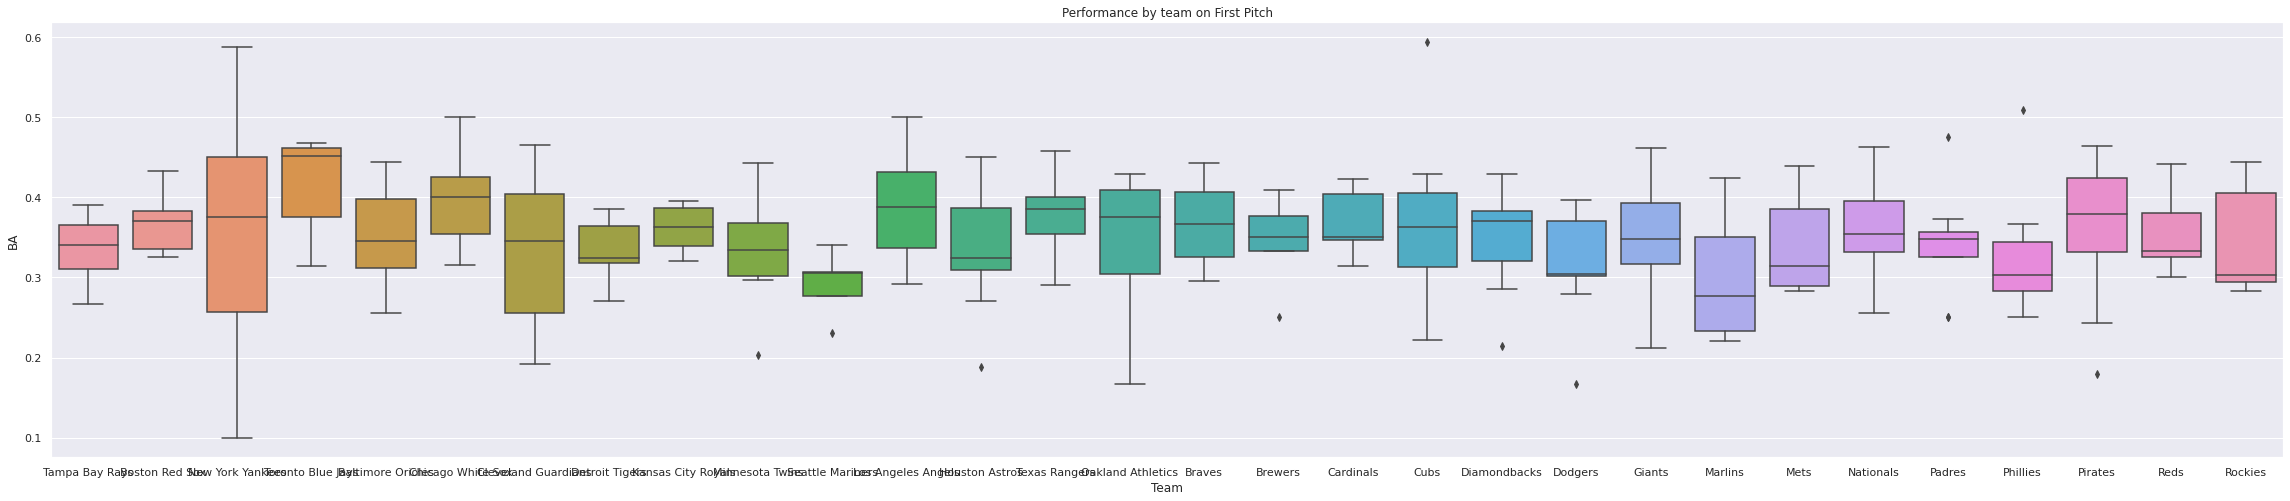

In [4]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_0_0).set(title='Performance by team on First Pitch')

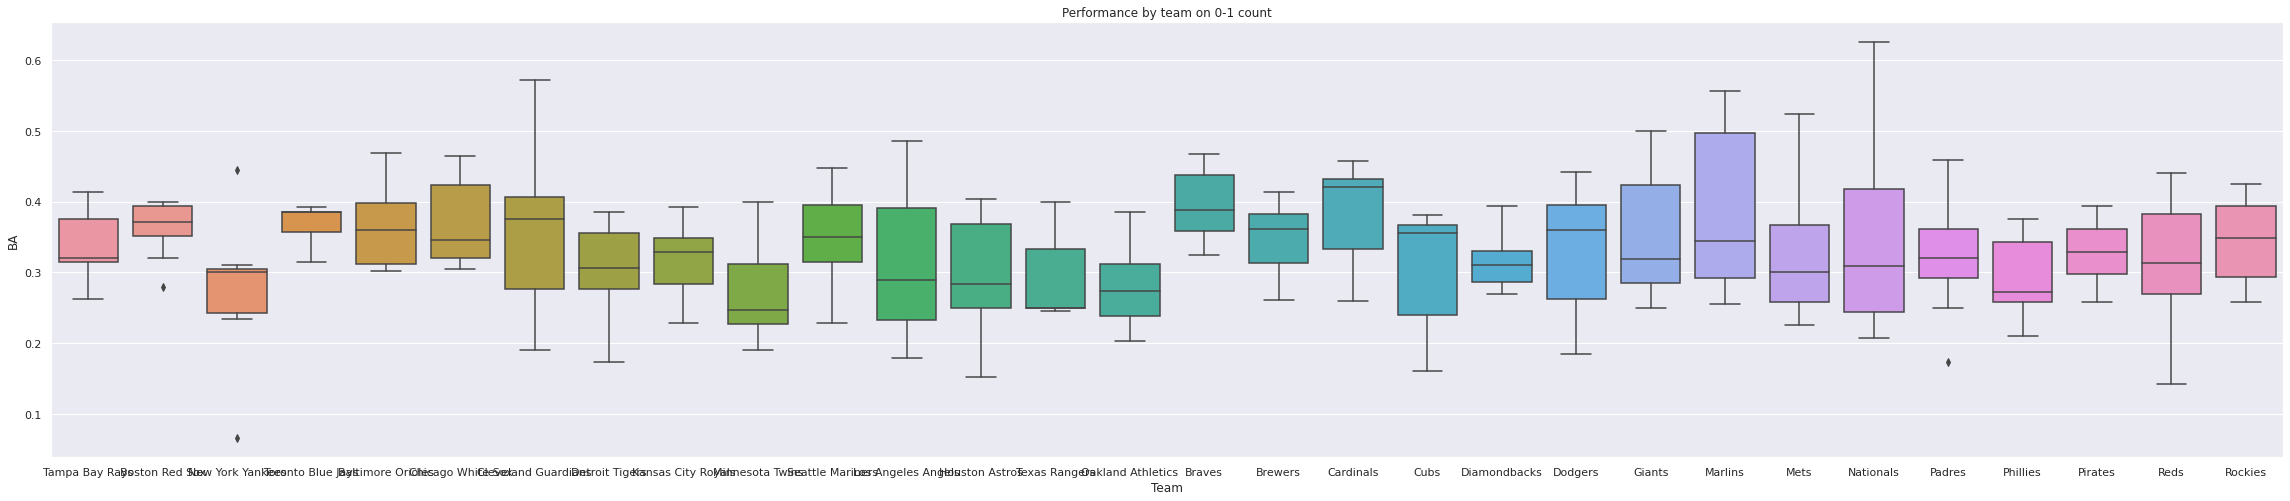

In [5]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_0_1).set(title='Performance by team on 0-1 count')

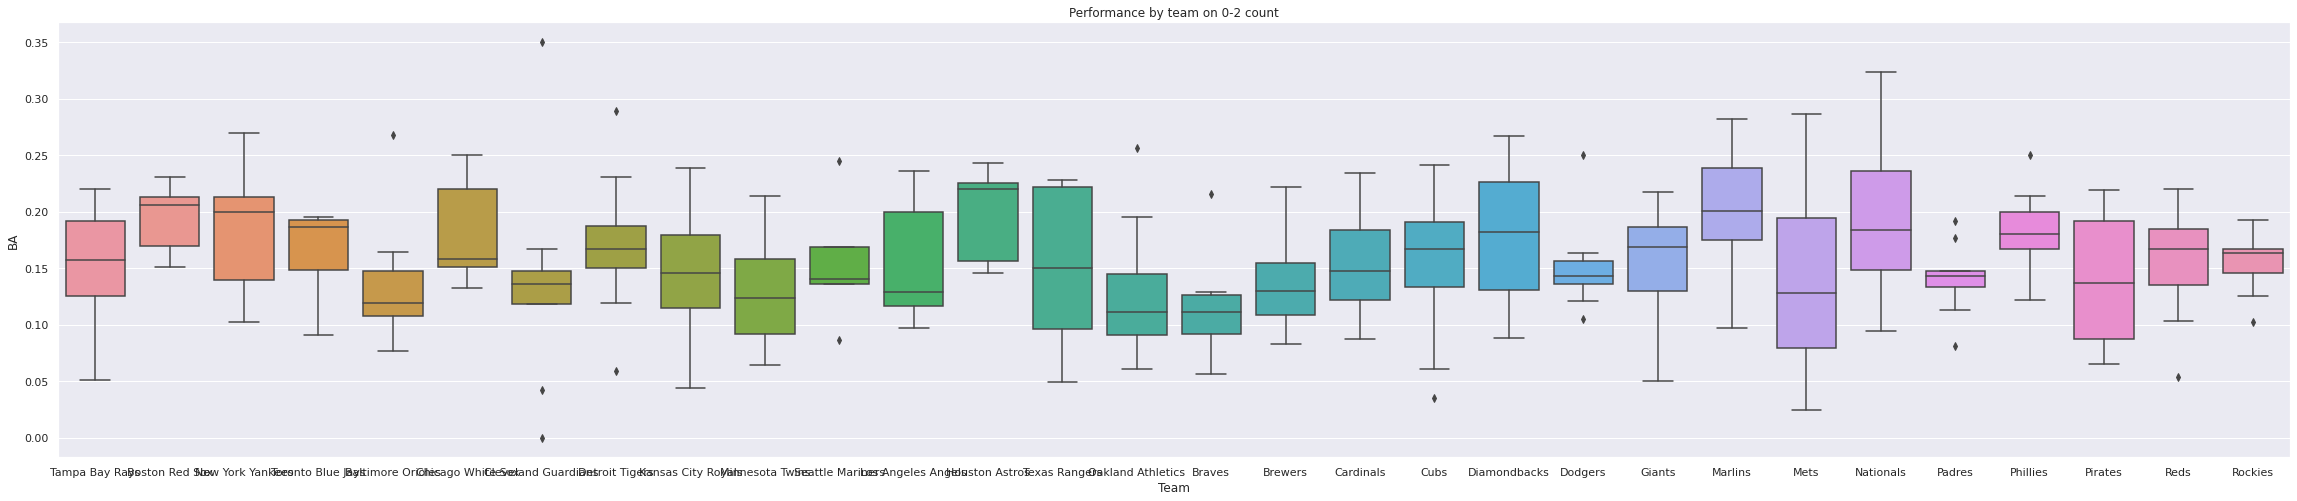

In [6]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_0_2).set(title='Performance by team on 0-2 count')

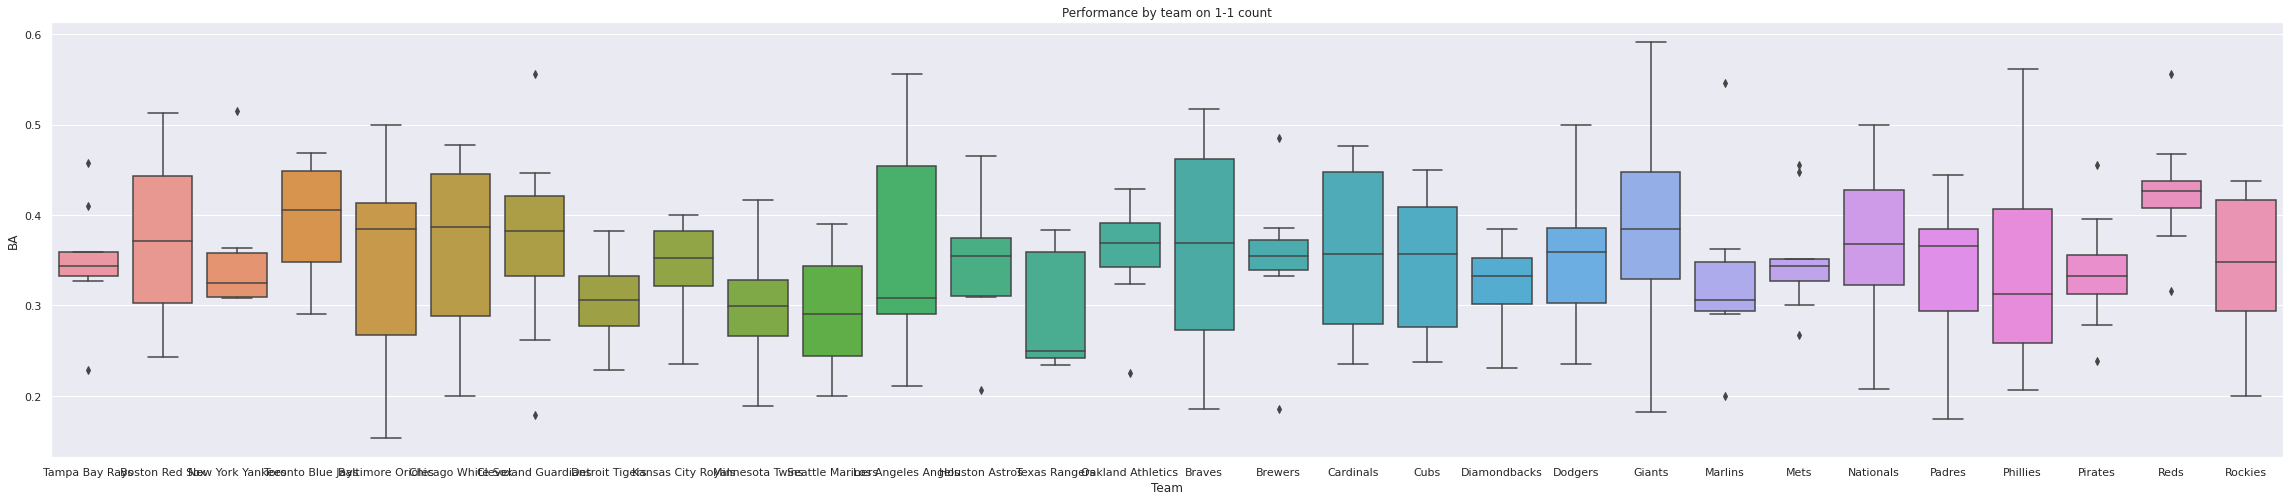

In [7]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_1_1).set(title='Performance by team on 1-1 count')

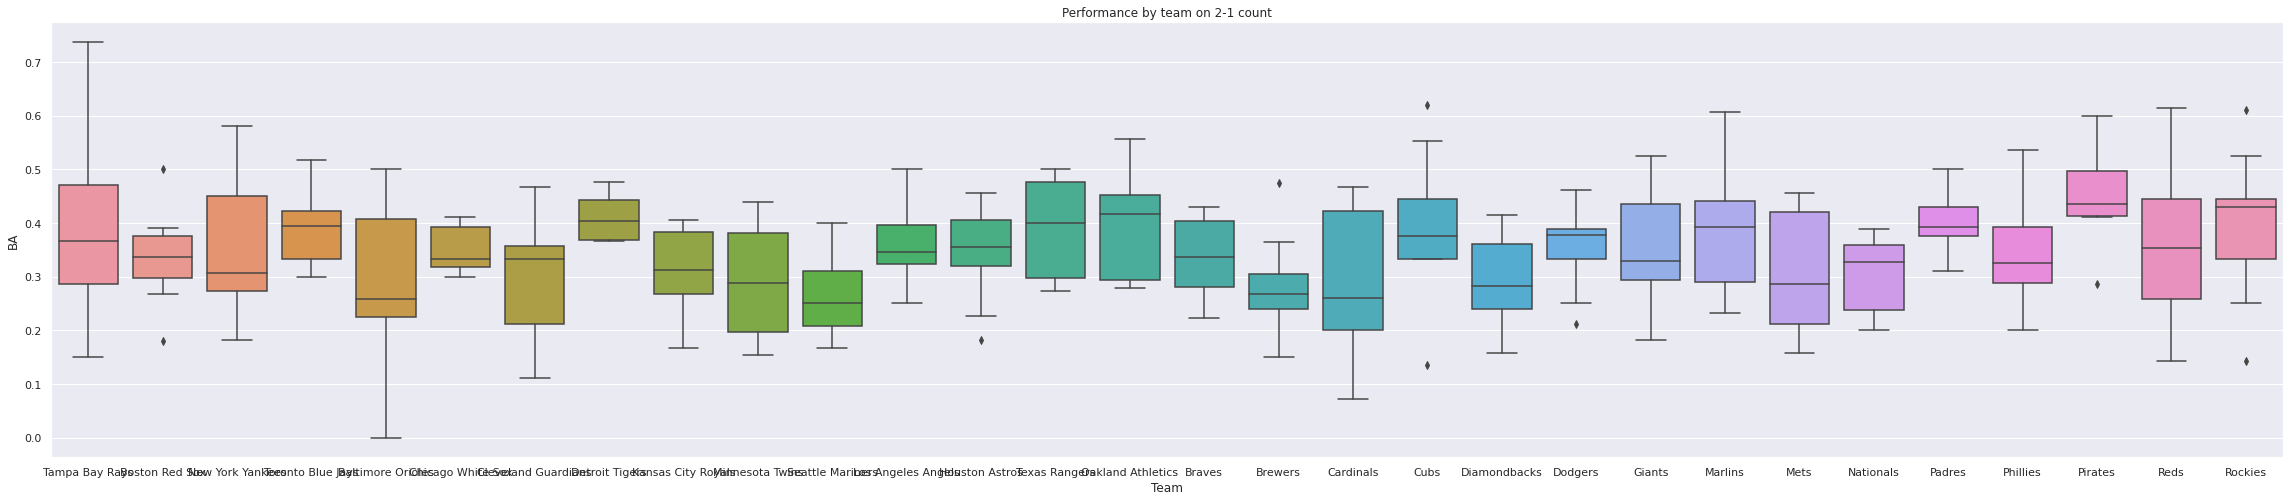

In [8]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_2_1).set(title='Performance by team on 2-1 count')

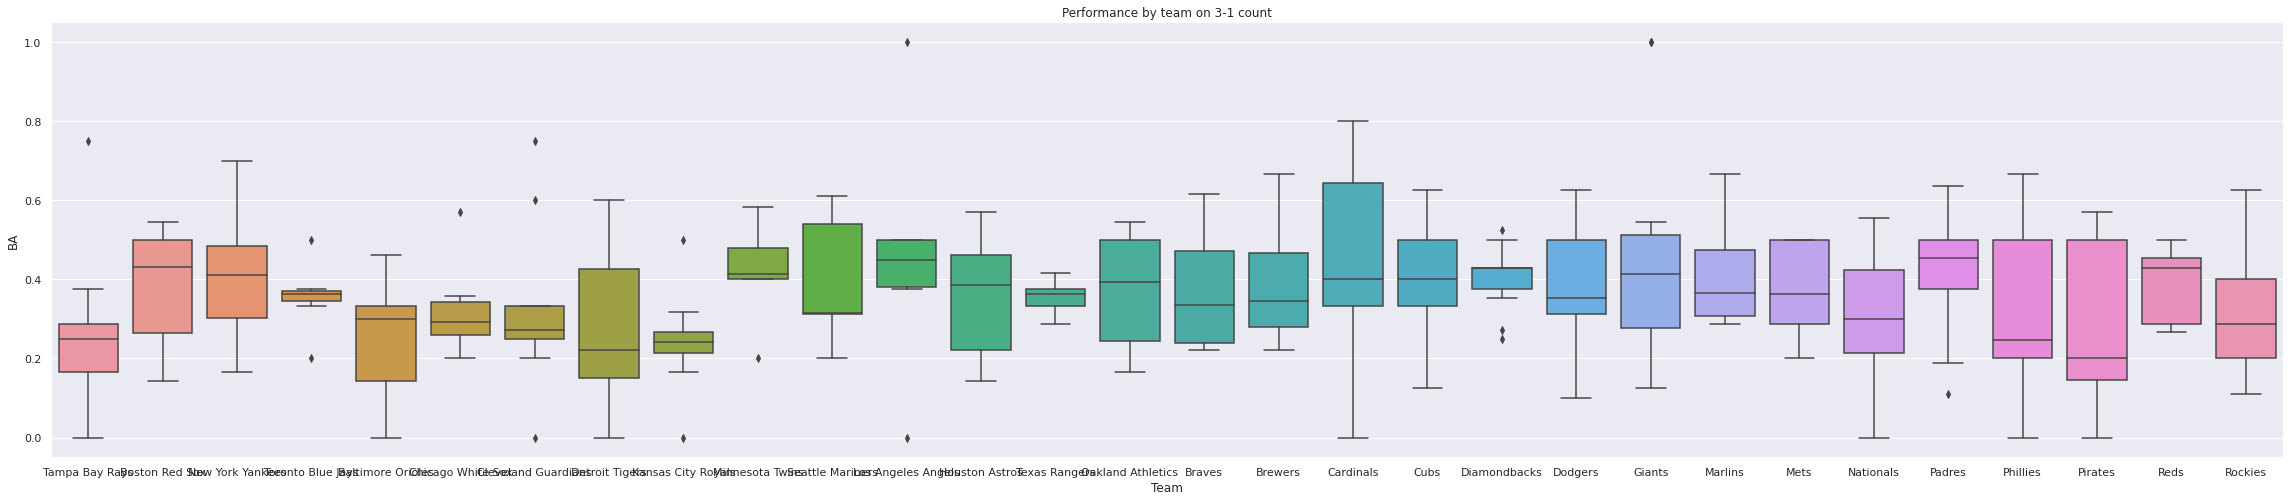

In [9]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_3_1).set(title='Performance by team on 3-1 count')

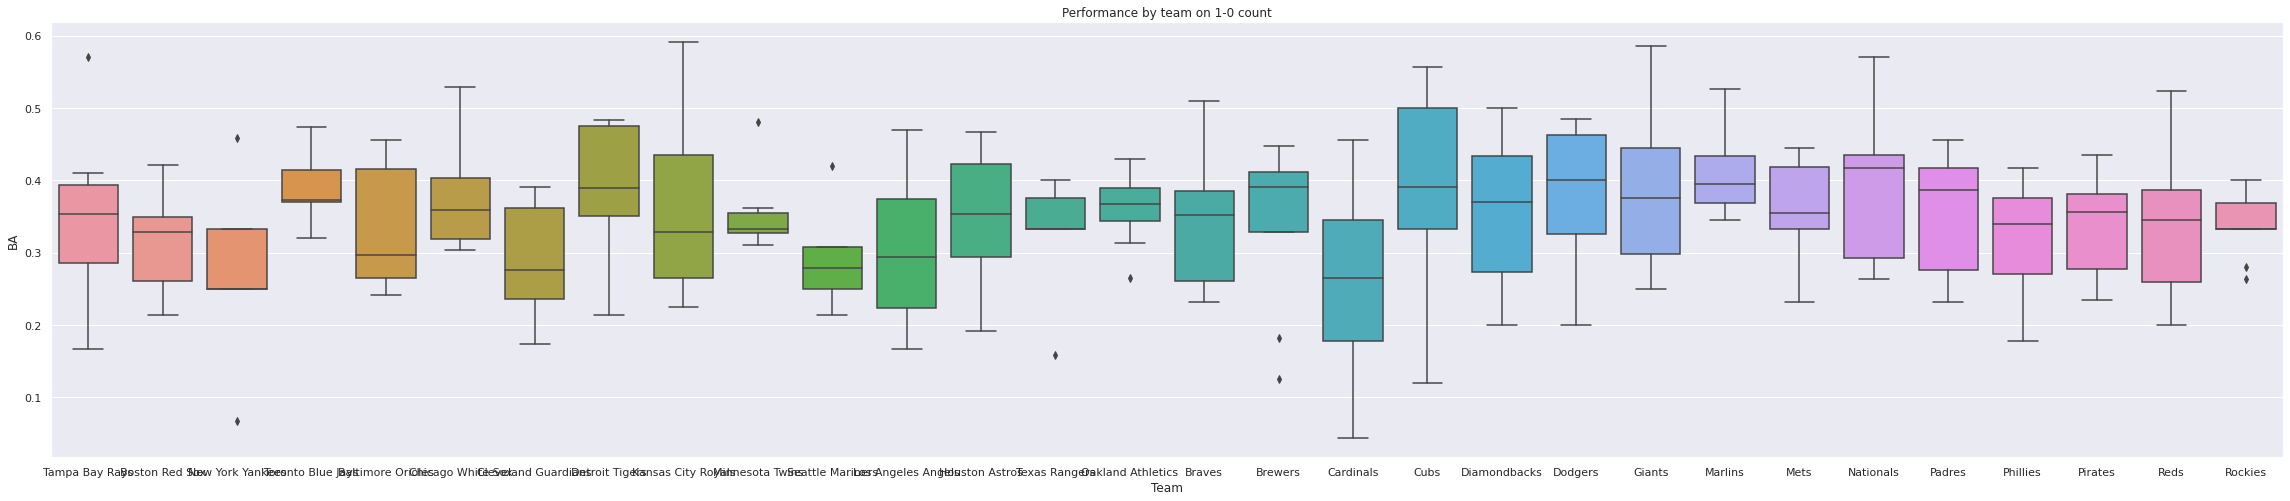

In [10]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_1_0).set(title='Performance by team on 1-0 count')

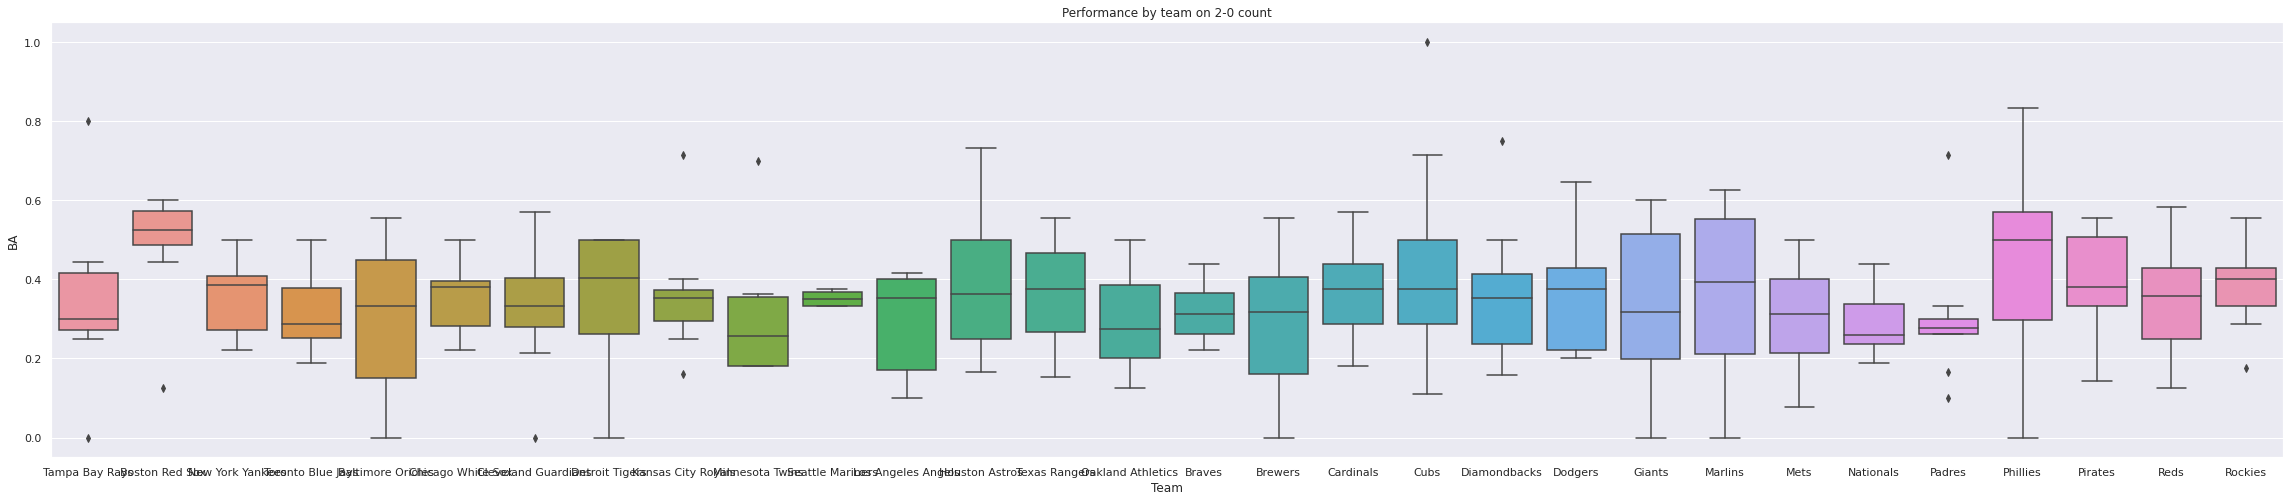

In [11]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_2_0).set(title='Performance by team on 2-0 count')

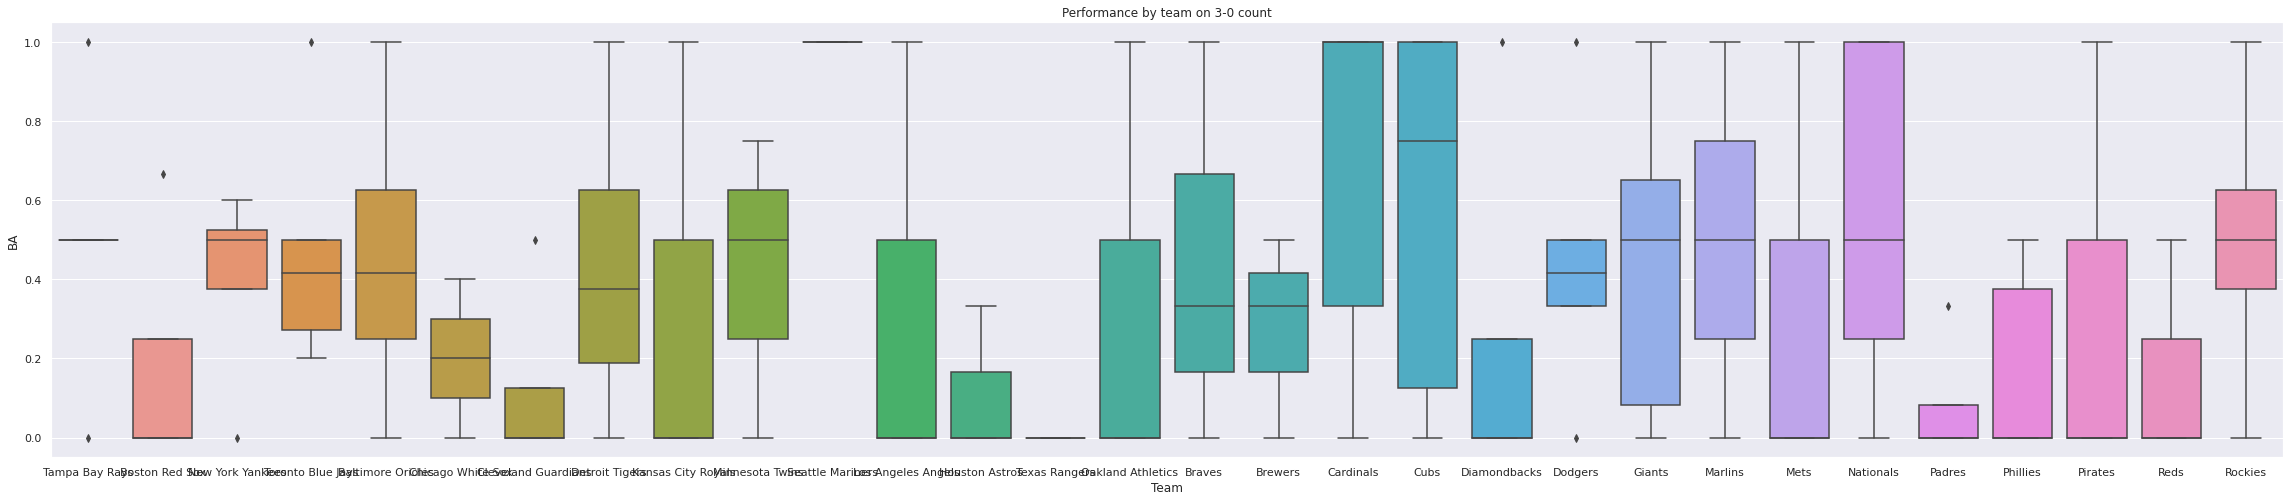

In [12]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_3_0).set(title='Performance by team on 3-0 count')

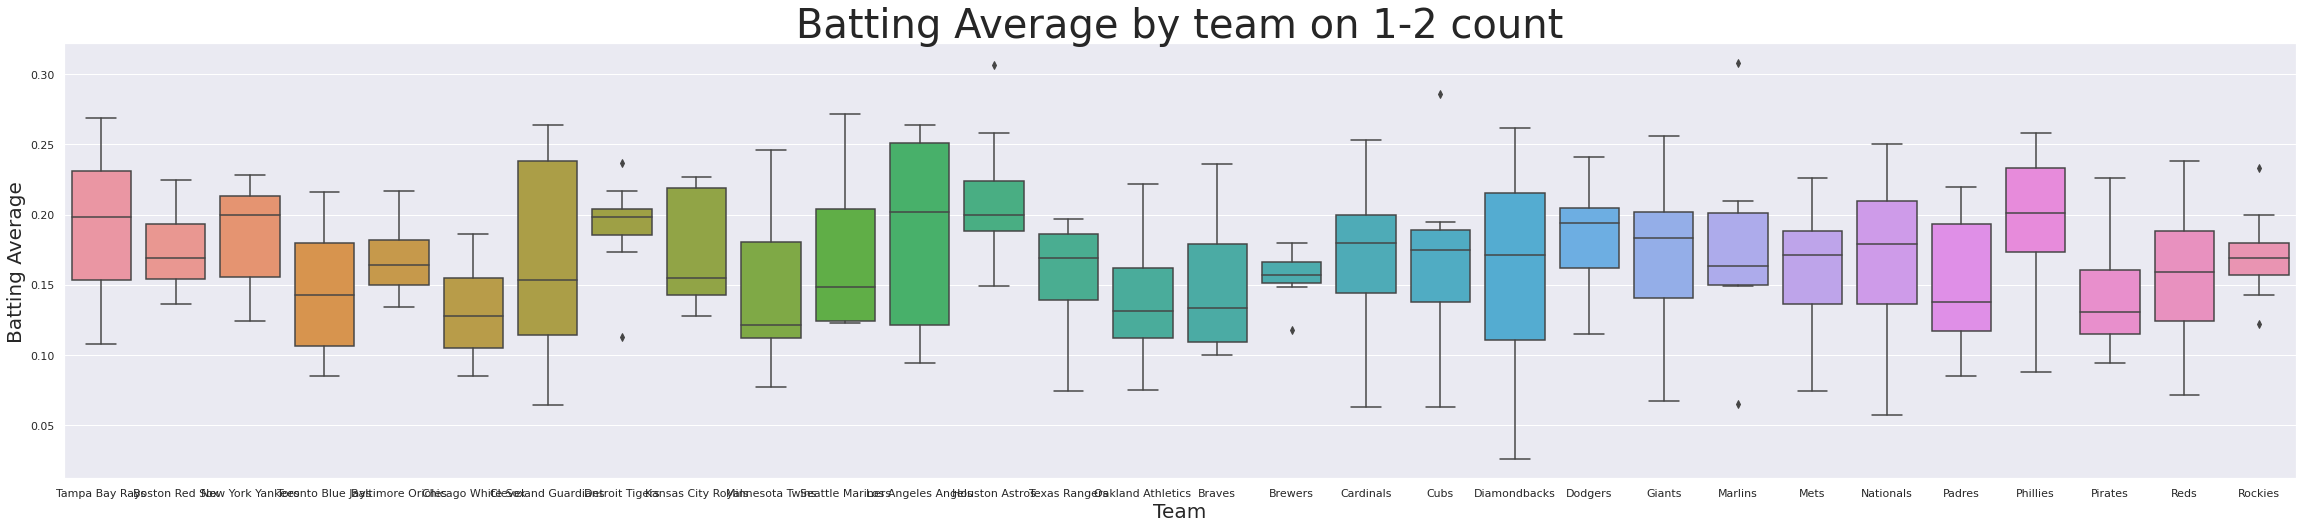

In [13]:
sns.set(rc = {'figure.figsize':(40,8)})
test = sns.boxplot(x='Team', y = 'BA', data = pitch_1_2)
test.axes.set_title("Batting Average by team on 1-2 count",fontsize=40)
test.set_xlabel("Team",fontsize=20)
test.set_ylabel("Batting Average",fontsize=20)

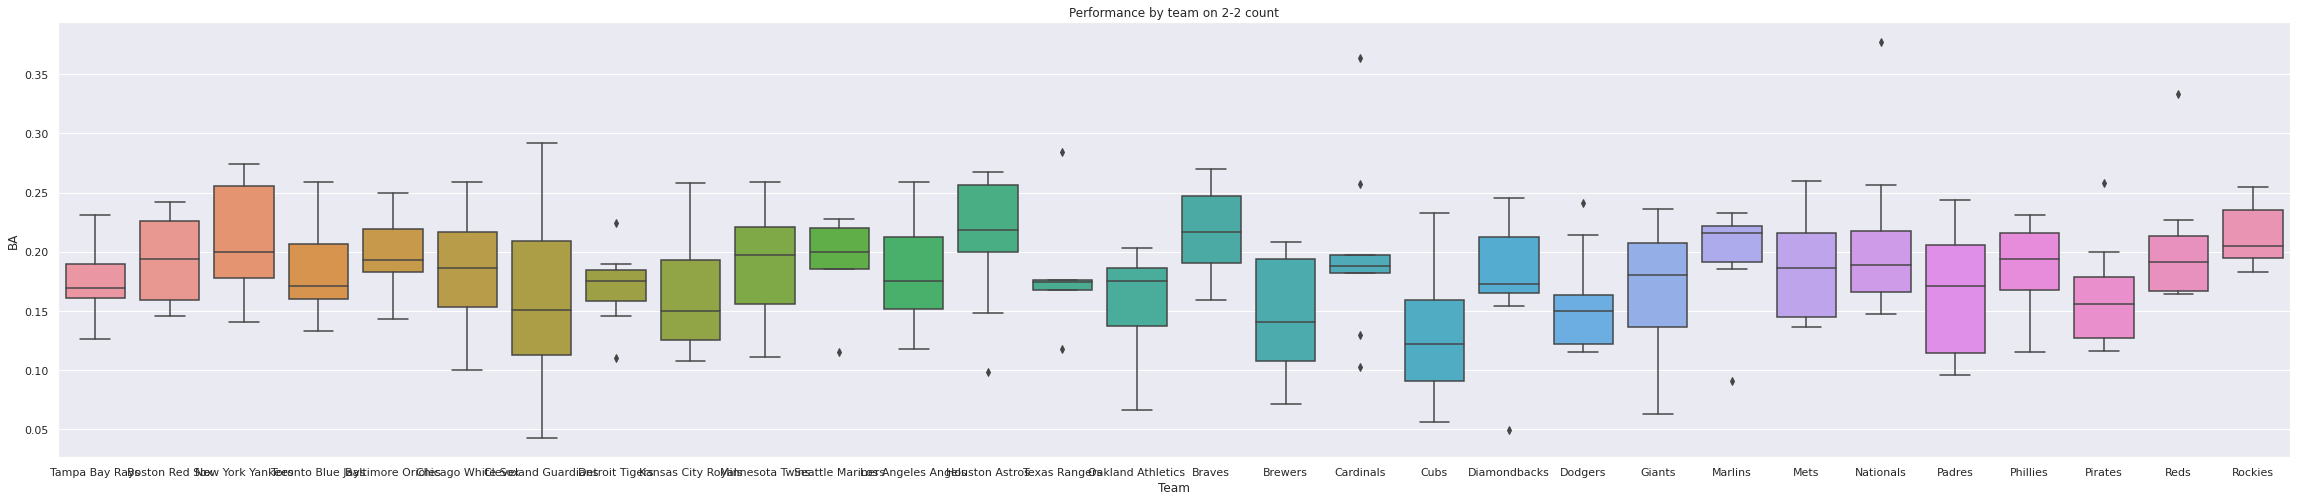

In [14]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_2_2).set(title='Performance by team on 2-2 count')

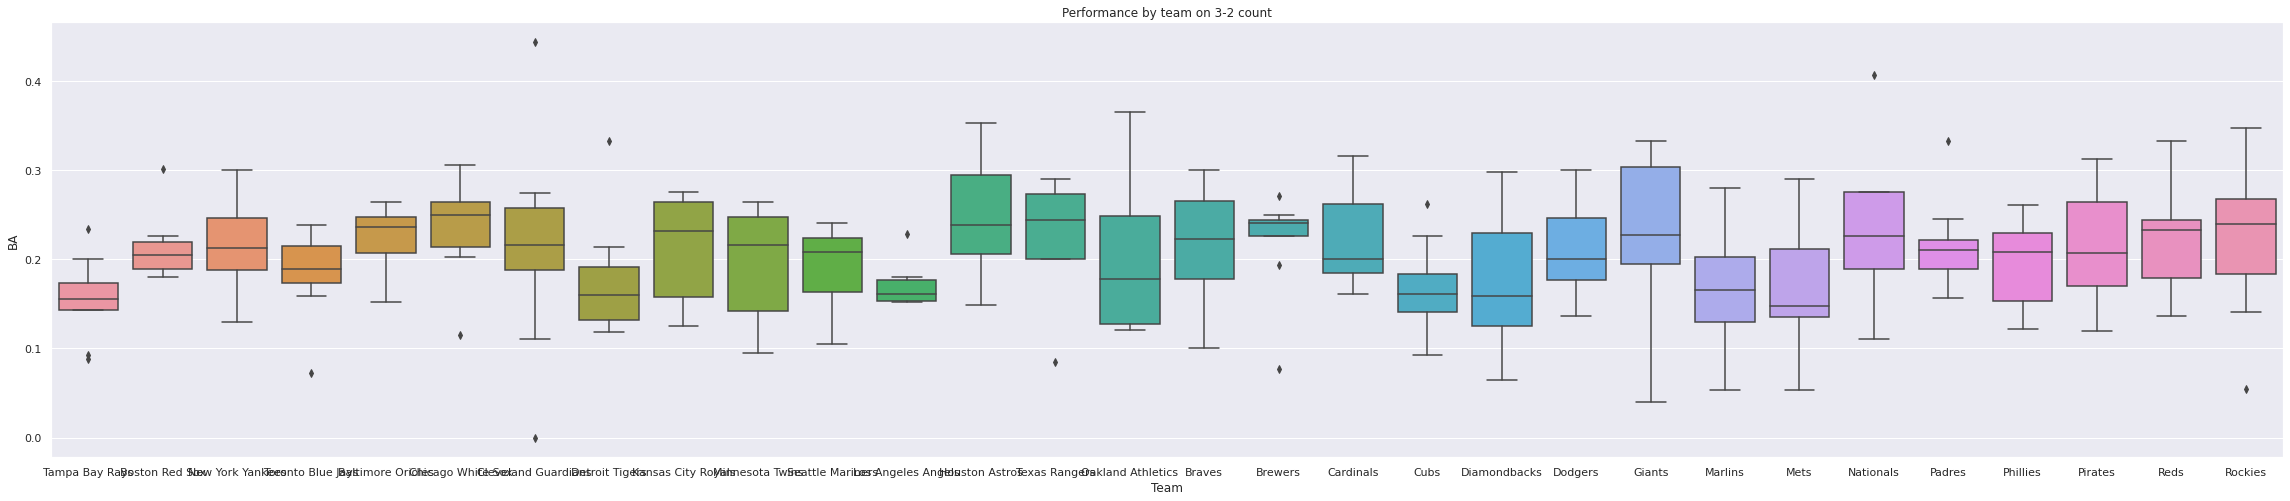

In [15]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x='Team', y = 'BA', data = pitch_3_2).set(title='Performance by team on 3-2 count')

In [16]:
stars = ['Bryce Harper', 'Jose Ramirez', 'Juan Soto', 'Mookie Betts', 'Vladamir Guerrero Jr.', 'Aaron Judge']
stars_df = pd.DataFrame(columns=['Team', 'Player', 'Count', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 
                           'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'GDP', 'HBP', 'SF', 'IBB'
                           'ROE', 'BAbip', 'tOPS+', 'sOPS+'])
for x in stars:
    temp_df = mastersheet.loc[mastersheet["Player"] ==  x]
    stars_df = stars_df.append(temp_df)

stars_df

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,GDP,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE
84,Phillies,Bryce Harper,First Pitch,51,63,60,18.0,22,6,0,...,2,2,1,NaN,0.316,97.0,122.0,0.0,0.0,0.0
85,Phillies,Bryce Harper,1-0 Count,23,24,24,10.0,10,1,0,...,0,0,0,NaN,0.300,153.0,190.0,0.0,0.0,0.0
86,Phillies,Bryce Harper,2-0 Count,9,10,10,1.0,5,1,0,...,1,0,0,NaN,0.444,163.0,177.0,0.0,0.0,0.0
87,Phillies,Bryce Harper,3-0 Count,35,37,2,1.0,1,0,0,...,0,0,0,NaN,0.000,452.0,256.0,0.0,14.0,0.0
88,Phillies,Bryce Harper,0-1 Count,44,47,44,7.0,12,7,0,...,4,1,1,NaN,0.233,58.0,98.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,New York Yankees,Aaron Judge,3-1 Count,39,40,17,4.0,6,3,0,...,1,0,0,NaN,0.313,224.0,107.0,0.0,0.0,1.0
272,New York Yankees,Aaron Judge,0-2 Count,38,45,45,9.0,9,3,0,...,0,0,0,NaN,0.412,27.0,204.0,0.0,0.0,0.0
273,New York Yankees,Aaron Judge,1-2 Count,76,97,97,5.0,21,4,0,...,1,0,0,NaN,0.391,22.0,176.0,0.0,0.0,1.0
274,New York Yankees,Aaron Judge,2-2 Count,86,113,113,10.0,22,2,0,...,2,0,0,NaN,0.288,16.0,132.0,0.0,0.0,2.0


In [17]:
scrubs = ['Gleyber Torres', 'Cesar Hernandez', 'Hunter Dozier', 'Nick Solak', 'Isiah Kiner-Falefa', 
          'Carlos Santana', 'David Fletcher', 'Elvis Andrus', 'Kevin Newman']
scrubs_df = pd.DataFrame(columns=['Team', 'Player', 'Count', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 
                           'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'GDP', 'HBP', 'SF', 'IBB'
                           'ROE', 'BAbip', 'tOPS+', 'sOPS+'])
for x in scrubs:
    temp_df = mastersheet.loc[mastersheet["Player"] ==  x]
    scrubs_df = scrubs_df.append(temp_df)

scrubs_df

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,GDP,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE
228,New York Yankees,Gleyber Torres,First Pitch,47,57,55,6.0,21,3,0,...,2,1,0,NaN,0.370,153.0,95.0,1.0,0.0,1.0
229,New York Yankees,Gleyber Torres,1-0 Count,31,33,33,4.0,11,1,0,...,1,0,0,NaN,0.313,125.0,78.0,0.0,0.0,1.0
230,New York Yankees,Gleyber Torres,2-0 Count,10,10,10,2.0,4,0,0,...,1,0,0,NaN,0.333,212.0,119.0,0.0,0.0,0.0
231,New York Yankees,Gleyber Torres,3-0 Count,11,12,2,NaN,0,0,0,...,0,0,0,NaN,0.000,152.0,-11.0,0.0,1.0,0.0
232,New York Yankees,Gleyber Torres,0-1 Count,33,35,34,6.0,8,2,0,...,3,0,1,NaN,0.206,74.0,45.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Pirates,Kevin Newman,3-1 Count,21,22,10,1.0,2,1,0,...,0,0,1,NaN,0.182,220.0,27.0,0.0,0.0,0.0
44,Pirates,Kevin Newman,0-2 Count,30,32,32,2.0,7,0,0,...,0,0,0,NaN,0.304,54.0,136.0,0.0,0.0,0.0
45,Pirates,Kevin Newman,1-2 Count,57,69,68,3.0,7,0,0,...,1,1,0,NaN,0.140,-23.0,13.0,0.0,0.0,1.0
46,Pirates,Kevin Newman,2-2 Count,62,67,66,4.0,17,3,0,...,1,0,1,NaN,0.281,109.0,165.0,0.0,0.0,2.0


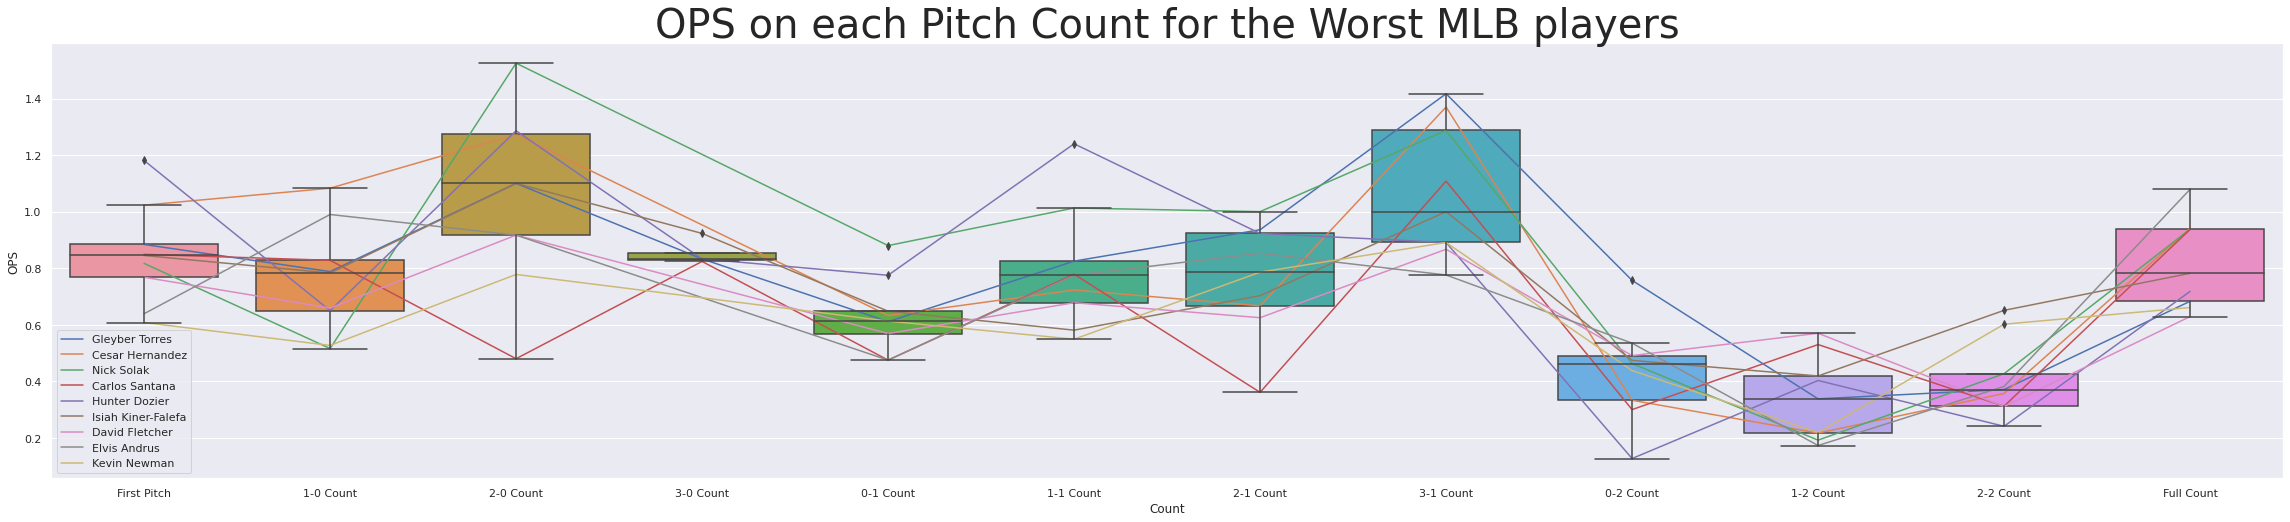

In [18]:
scrubs = ['Gleyber Torres', 'Cesar Hernandez', 'Hunter Dozier', 'Nick Solak', 'Isiah Kiner-Falefa', 
          'Carlos Santana', 'David Fletcher', 'Elvis Andrus', 'Kevin Newman']
gleyber = scrubs_df.loc[scrubs_df['Player'] == 'Gleyber Torres']
cesar = scrubs_df.loc[scrubs_df['Player'] == 'Cesar Hernandez']
solak = scrubs_df.loc[scrubs_df['Player'] == 'Nick Solak']
csantana = scrubs_df.loc[scrubs_df['Player'] == 'Carlos Santana']
hdozier = scrubs_df.loc[scrubs_df['Player'] == 'Hunter Dozier']
ikf = scrubs_df.loc[scrubs_df['Player'] == 'Isiah Kiner-Falefa']
fletcher = scrubs_df.loc[scrubs_df['Player'] == 'David Fletcher']
andrus = scrubs_df.loc[scrubs_df['Player'] == 'Elvis Andrus']
newman = scrubs_df.loc[scrubs_df['Player'] == 'Kevin Newman']

sns.set(rc = {'figure.figsize':(40,8)})
sns.lineplot(x="Count", y="OPS", data=gleyber)
sns.lineplot(x="Count", y="OPS", data=cesar)
sns.lineplot(x="Count", y="OPS", data=solak)
sns.lineplot(x="Count", y="OPS", data=csantana)
sns.lineplot(x="Count", y="OPS", data=hdozier)
sns.lineplot(x="Count", y="OPS", data=ikf)
sns.lineplot(x="Count", y="OPS", data=fletcher)
sns.lineplot(x="Count", y="OPS", data=andrus)
sns.lineplot(x="Count", y="OPS", data=newman)
plt.legend(labels=['Gleyber Torres', 'Cesar Hernandez', 'Nick Solak', 'Carlos Santana', 'Hunter Dozier', 'Isiah Kiner-Falefa', 
           'David Fletcher', 'Elvis Andrus', 'Kevin Newman'])

test = sns.boxplot(x='Count', y = 'OPS', data = scrubs_df)
test.axes.set_title("OPS on each Pitch Count for the Worst MLB players",fontsize=40)

plt.show()

In [19]:
scrubs_df

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,GDP,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE
228,New York Yankees,Gleyber Torres,First Pitch,47,57,55,6.0,21,3,0,...,2,1,0,NaN,0.370,153.0,95.0,1.0,0.0,1.0
229,New York Yankees,Gleyber Torres,1-0 Count,31,33,33,4.0,11,1,0,...,1,0,0,NaN,0.313,125.0,78.0,0.0,0.0,1.0
230,New York Yankees,Gleyber Torres,2-0 Count,10,10,10,2.0,4,0,0,...,1,0,0,NaN,0.333,212.0,119.0,0.0,0.0,0.0
231,New York Yankees,Gleyber Torres,3-0 Count,11,12,2,NaN,0,0,0,...,0,0,0,NaN,0.000,152.0,-11.0,0.0,1.0,0.0
232,New York Yankees,Gleyber Torres,0-1 Count,33,35,34,6.0,8,2,0,...,3,0,1,NaN,0.206,74.0,45.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Pirates,Kevin Newman,3-1 Count,21,22,10,1.0,2,1,0,...,0,0,1,NaN,0.182,220.0,27.0,0.0,0.0,0.0
44,Pirates,Kevin Newman,0-2 Count,30,32,32,2.0,7,0,0,...,0,0,0,NaN,0.304,54.0,136.0,0.0,0.0,0.0
45,Pirates,Kevin Newman,1-2 Count,57,69,68,3.0,7,0,0,...,1,1,0,NaN,0.140,-23.0,13.0,0.0,0.0,1.0
46,Pirates,Kevin Newman,2-2 Count,62,67,66,4.0,17,3,0,...,1,0,1,NaN,0.281,109.0,165.0,0.0,0.0,2.0


In [20]:
scurbs_20 = scrubs_df.loc[scrubs_df['Count'] == '2-0 Count' ]
scurbs_20

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,GDP,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE
230,New York Yankees,Gleyber Torres,2-0 Count,10,10,10,2.0,4,0,0,...,1,0,0,NaN,0.333,212.0,119.0,0.0,0.0,0.0
554,Cleveland Guardians,Cesar Hernandez,2-0 Count,11,11,11,4.0,5,1,0,...,0,0,0,NaN,0.400,260.0,152.0,0.0,0.0,0.0
807,Kansas City Royals,Hunter Dozier,2-0 Count,14,14,14,4.0,5,2,0,...,1,0,0,NaN,0.250,261.0,141.0,0.0,0.0,0.0
1155,Texas Rangers,Nick Solak,2-0 Count,11,11,9,2.0,5,3,0,...,1,2,0,NaN,0.556,348.0,214.0,0.0,0.0,0.0
1167,Texas Rangers,Isiah Kiner-Falefa,2-0 Count,15,16,15,2.0,7,2,0,...,0,1,0,NaN,0.467,228.0,132.0,0.0,0.0,0.0
746,Kansas City Royals,Carlos Santana,2-0 Count,23,25,25,3.0,4,1,0,...,0,0,0,NaN,0.125,44.0,-7.0,0.0,0.0,2.0
987,Los Angeles Angels,David Fletcher,2-0 Count,11,12,12,NaN,5,1,0,...,0,0,0,NaN,0.417,195.0,93.0,0.0,0.0,0.0
1239,Oakland Athletics,Elvis Andrus,2-0 Count,12,12,12,1.0,5,1,0,...,0,0,0,NaN,0.417,198.0,93.0,0.0,0.0,0.0
38,Pirates,Kevin Newman,2-0 Count,9,9,9,2.0,3,1,0,...,0,0,0,NaN,0.333,169.0,61.0,0.0,0.0,0.0


In [21]:
stars_20 = stars_df.loc[stars_df['Count'] == '2-0 Count' ]
stars_20

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,GDP,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE
86,Phillies,Bryce Harper,2-0 Count,9,10,10,1.0,5,1,0,...,1,0,0,NaN,0.444,163.0,177.0,0.0,0.0,0.0
578,Cleveland Guardians,Jose Ramirez,2-0 Count,14,15,14,2.0,3,0,0,...,1,0,1,NaN,0.200,-4.0,-11.0,0.0,0.0,1.0
74,Nationals,Juan Soto,2-0 Count,14,15,15,3.0,4,0,0,...,1,0,0,NaN,0.214,45.0,46.0,0.0,0.0,1.0
74,Dodgers,Mookie Betts,2-0 Count,21,25,24,9.0,9,2,0,...,0,1,0,NaN,0.286,180.0,139.0,0.0,0.0,0.0
290,Toronto Blue Jays,Vladamir Guerrero Jr.,2-0 Count,16,17,17,3.0,8,2,0,...,2,0,0,NaN,0.438,145.0,149.0,0.0,0.0,1.0
266,New York Yankees,Aaron Judge,2-0 Count,10,11,11,5.0,3,0,0,...,0,0,0,NaN,0.200,73.0,59.0,0.0,0.0,0.0


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


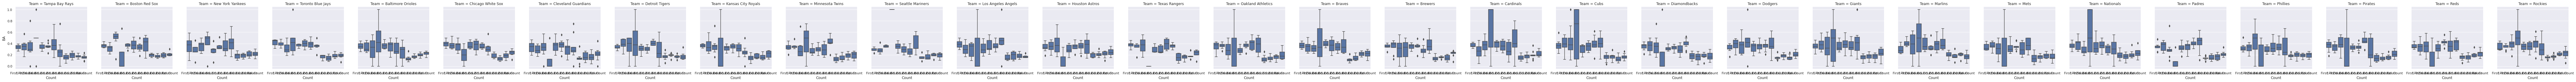

In [22]:
sns.set(rc = {'figure.figsize':(40,8)})
g = sns.FacetGrid(mastersheet, col="Team", height=4)
g.map(sns.boxplot, "Count", "BA")

In [23]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(data = mlb_avg, x = "Count", y = "SLG")

NameError: NameError: name 'mlb_avg' is not defined

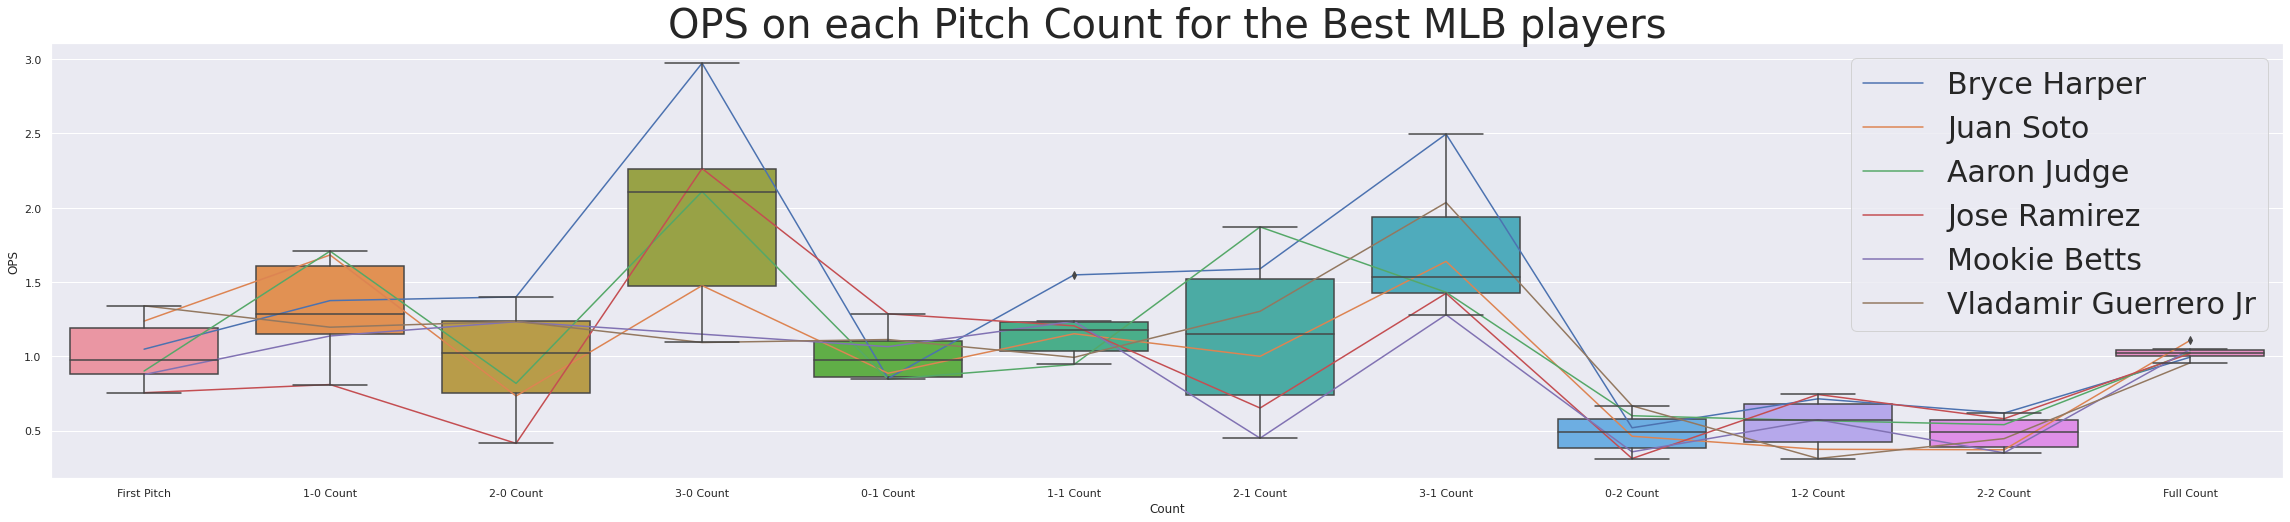

In [82]:
stars_df['K Rate'] = stars_df['SO']/stars_df['PA']

bryce = stars_df.loc[stars_df['Player'] == 'Bryce Harper']
soto = stars_df.loc[stars_df['Player'] == 'Juan Soto']
vlad = stars_df.loc[stars_df['Player'] == 'Vladamir Guerrero Jr.']
jose = stars_df.loc[stars_df['Player'] == 'Jose Ramirez']
betts = stars_df.loc[stars_df['Player'] == 'Mookie Betts']
judge = stars_df.loc[stars_df['Player'] == 'Aaron Judge']

sns.lineplot(x="Count", y="OPS", data=bryce)
sns.lineplot(x="Count", y="OPS", data=soto)
sns.lineplot(x="Count", y="OPS", data=judge)
sns.lineplot(x="Count", y="OPS", data=jose)
sns.lineplot(x="Count", y="OPS", data=betts)
sns.lineplot(x="Count", y="OPS", data=vlad)
plt.legend(labels=["Bryce Harper","Juan Soto", "Aaron Judge", "Jose Ramirez", "Mookie Betts", "Vladamir Guerrero Jr"], fontsize=30)
test = sns.boxplot(x='Count', y = 'OPS', data = stars_df)
test.axes.set_title("OPS on each Pitch Count for the Best MLB players",fontsize=40)

plt.show()

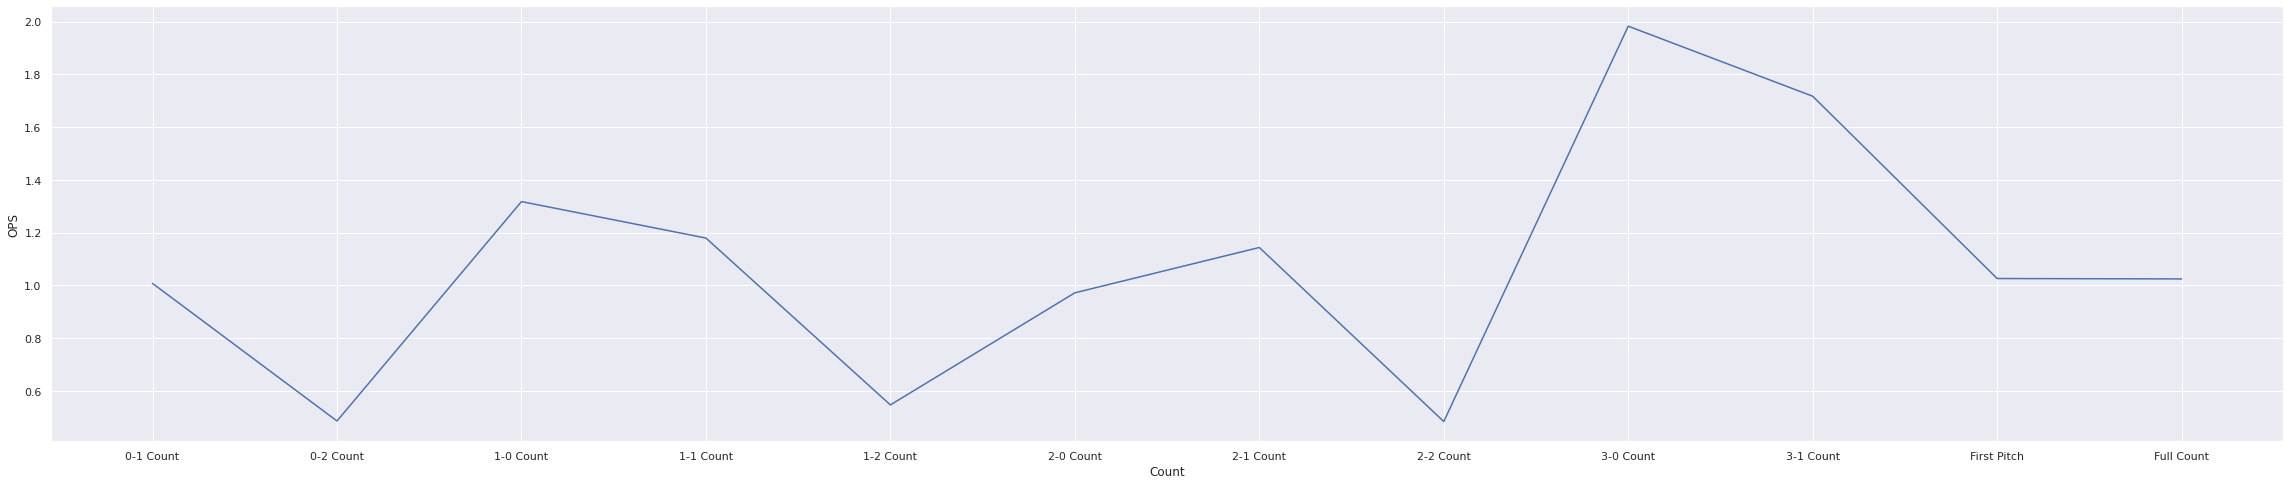

In [55]:
avg_stars = stars_df.groupby('Count').mean()
avg_stars = avg_stars.reset_index()
sns.lineplot(x='Count', y='OPS', data=avg_stars)

In [56]:
avg_stars

,Count,R,BA,OBP,SLG,OPS,BAbip,tOPS+,sOPS+,SH,IBB,ROE
0,0-1 Count,11.666667,0.331667,0.346167,0.661833,1.007833,0.271000,109.166667,135.500000,0.166667,0.000000,1.166667
1,0-2 Count,5.833333,0.164500,0.171333,0.314833,0.486167,0.278667,-0.333333,147.833333,0.000000,0.000000,0.166667
2,1-0 Count,10.000000,0.436000,0.432500,0.885333,1.318000,0.352333,168.666667,182.166667,0.000000,0.000000,0.000000
3,1-1 Count,9.000000,0.409833,0.409333,0.770667,1.179833,0.347000,142.000000,154.666667,0.166667,0.000000,0.333333
4,1-2 Count,7.833333,0.203667,0.207500,0.339833,0.547167,0.311833,15.000000,165.833333,0.000000,0.000000,0.166667
5,2-0 Count,3.833333,0.350000,0.351833,0.620833,0.972167,0.297000,100.333333,93.166667,0.000000,0.000000,0.500000
6,2-1 Count,9.833333,0.387000,0.391667,0.752167,1.144000,0.317333,131.166667,141.000000,0.000000,0.000000,0.166667
7,2-2 Count,9.666667,0.173500,0.179667,0.304833,0.484167,0.258000,0.833333,108.833333,0.000000,0.000000,0.333333
8,3-0 Count,1.600000,0.486600,0.917833,1.081600,1.983000,0.333200,314.200000,132.400000,0.000000,8.833333,0.000000
9,3-1 Count,5.166667,0.393333,0.762333,0.955333,1.717500,0.265833,260.166667,149.000000,0.000000,0.833333,0.333333


In [58]:
avg_stars = avg_stars.reindex([10, 2, 5, 8, 0, 3, 6, 9, 1, 4, 7, 11])
avg_stars

,Count,R,BA,OBP,SLG,OPS,BAbip,tOPS+,sOPS+,SH,IBB,ROE
10,First Pitch,19.500000,0.364000,0.367500,0.658833,1.026333,0.307000,110.666667,116.833333,0.000000,0.000000,0.166667
2,1-0 Count,10.000000,0.436000,0.432500,0.885333,1.318000,0.352333,168.666667,182.166667,0.000000,0.000000,0.000000
5,2-0 Count,3.833333,0.350000,0.351833,0.620833,0.972167,0.297000,100.333333,93.166667,0.000000,0.000000,0.500000
8,3-0 Count,1.600000,0.486600,0.917833,1.081600,1.983000,0.333200,314.200000,132.400000,0.000000,8.833333,0.000000
0,0-1 Count,11.666667,0.331667,0.346167,0.661833,1.007833,0.271000,109.166667,135.500000,0.166667,0.000000,1.166667
3,1-1 Count,9.000000,0.409833,0.409333,0.770667,1.179833,0.347000,142.000000,154.666667,0.166667,0.000000,0.333333
6,2-1 Count,9.833333,0.387000,0.391667,0.752167,1.144000,0.317333,131.166667,141.000000,0.000000,0.000000,0.166667
9,3-1 Count,5.166667,0.393333,0.762333,0.955333,1.717500,0.265833,260.166667,149.000000,0.000000,0.833333,0.333333
1,0-2 Count,5.833333,0.164500,0.171333,0.314833,0.486167,0.278667,-0.333333,147.833333,0.000000,0.000000,0.166667
4,1-2 Count,7.833333,0.203667,0.207500,0.339833,0.547167,0.311833,15.000000,165.833333,0.000000,0.000000,0.166667


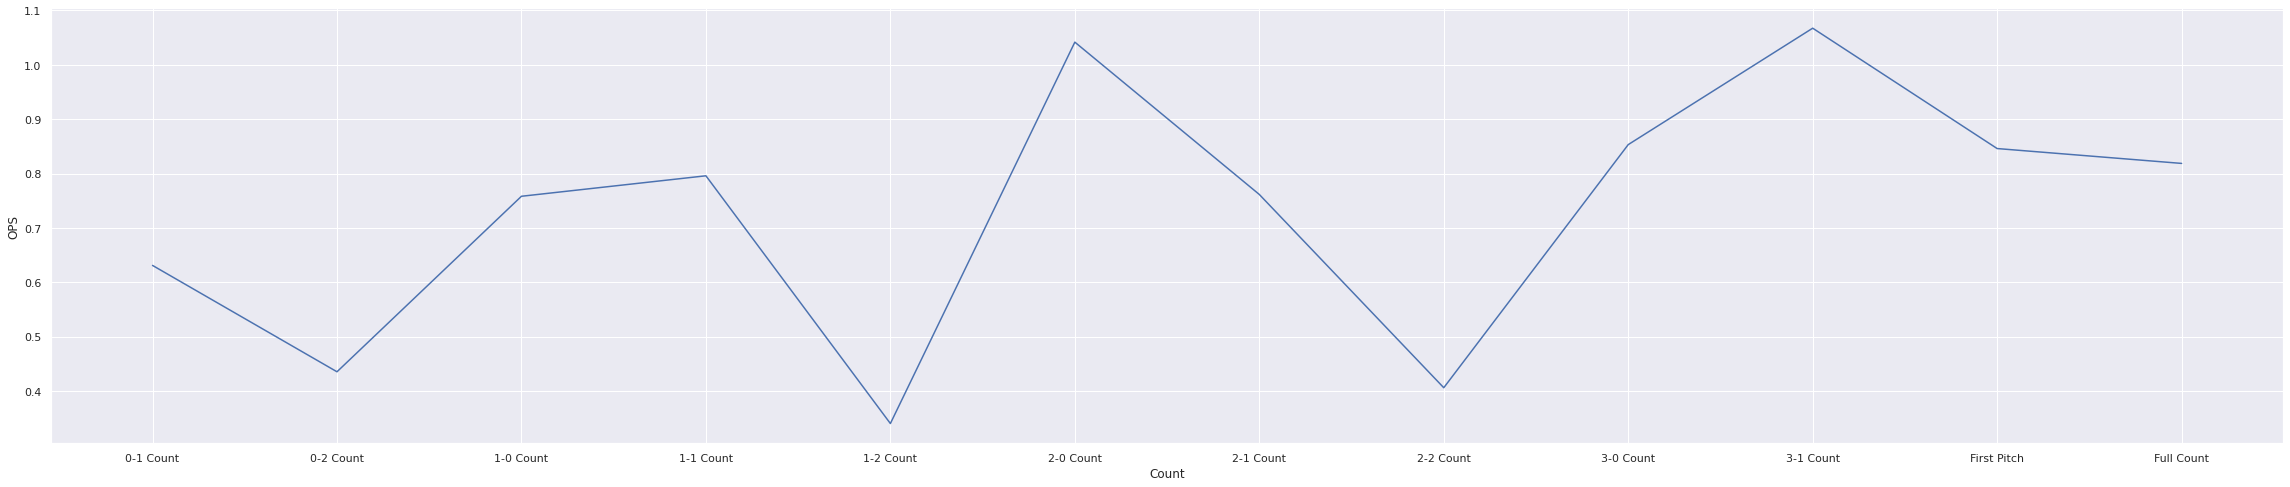

In [59]:
avg_scrubs = scrubs_df.groupby('Count').mean()
avg_scrubs = avg_scrubs.reset_index()
sns.lineplot(x='Count', y='OPS', data=avg_scrubs)

In [72]:
league_avg = mastersheet.groupby('Count').mean()
league_avg = league_avg.reset_index()
league_avg = league_avg.reindex([10, 2, 5, 8, 0, 3, 6, 9, 1, 4, 7, 11])
league_avg

,Count,R,BA,OBP,SLG,OPS,SH,IBB,ROE,BAbip,tOPS+,sOPS+
10,First Pitch,11.466667,0.349408,0.360379,0.604829,0.965142,0.341667,0.000000,0.512500,0.305450,147.379167,105.762500
2,1-0 Count,6.142259,0.346267,0.349842,0.618504,0.968321,0.079167,0.000000,0.270833,0.298779,147.495833,111.166667
5,2-0 Count,2.976526,0.352954,0.354796,0.687506,1.043787,0.004167,0.000000,0.166667,0.290529,165.209205,104.497908
8,3-0 Count,1.495146,0.363537,0.934992,0.720575,1.604761,0.000000,2.095833,0.004167,0.305061,321.925373,85.097015
0,0-1 Count,7.512500,0.330404,0.339367,0.553754,0.893042,0.079167,0.000000,0.412500,0.292000,129.245833,112.304167
3,1-1 Count,7.254167,0.350567,0.355196,0.598913,0.954092,0.075000,0.000000,0.429167,0.308588,144.141667,108.741667
6,2-1 Count,4.782051,0.347958,0.351996,0.629446,0.981417,0.041667,0.000000,0.208333,0.300271,149.958333,108.908333
9,3-1 Count,2.914027,0.360304,0.722446,0.716413,1.438808,0.008333,0.116667,0.066667,0.296412,282.645833,107.670833
1,0-2 Count,3.832618,0.158492,0.169321,0.248754,0.418000,0.000000,0.000000,0.225000,0.290254,7.900000,117.433333
4,1-2 Count,6.162500,0.168058,0.177558,0.263362,0.440821,0.000000,0.000000,0.483333,0.294050,14.091667,116.250000


In [60]:
avg_scrubs = avg_scrubs.reindex([10, 2, 5, 8, 0, 3, 6, 9, 1, 4, 7, 11])
avg_scrubs

,Count,R,BA,OBP,SLG,OPS,BAbip,tOPS+,sOPS+,SH,IBB,ROE
10,First Pitch,11.777778,0.329000,0.344889,0.501333,0.846000,0.301111,154.666667,83.444444,1.111111,0.000000,0.555556
2,1-0 Count,6.222222,0.291778,0.296667,0.461778,0.758222,0.262000,129.444444,68.111111,0.333333,0.000000,0.444444
5,2-0 Count,2.500000,0.395778,0.408333,0.633333,1.041778,0.366444,212.777778,110.888889,0.000000,0.000000,0.222222
8,3-0 Count,1.000000,0.000000,0.934778,0.000000,0.853250,0.000000,174.500000,-9.000000,0.000000,1.555556,0.000000
0,0-1 Count,7.888889,0.264222,0.271222,0.359778,0.631000,0.249333,92.000000,53.666667,0.444444,0.000000,0.222222
3,1-1 Count,7.111111,0.301556,0.302889,0.493222,0.795889,0.275444,139.444444,75.000000,0.222222,0.000000,0.444444
6,2-1 Count,4.777778,0.294333,0.293667,0.467667,0.761556,0.274000,130.444444,64.666667,0.111111,0.000000,0.444444
9,3-1 Count,3.000000,0.228667,0.651889,0.415444,1.067444,0.182667,231.666667,52.888889,0.000000,0.000000,0.000000
1,0-2 Count,3.444444,0.192778,0.199444,0.236000,0.435333,0.319778,34.000000,131.111111,0.000000,0.000000,0.333333
4,1-2 Count,5.666667,0.146111,0.156667,0.183444,0.340111,0.234889,3.888889,70.888889,0.000000,0.000000,0.666667


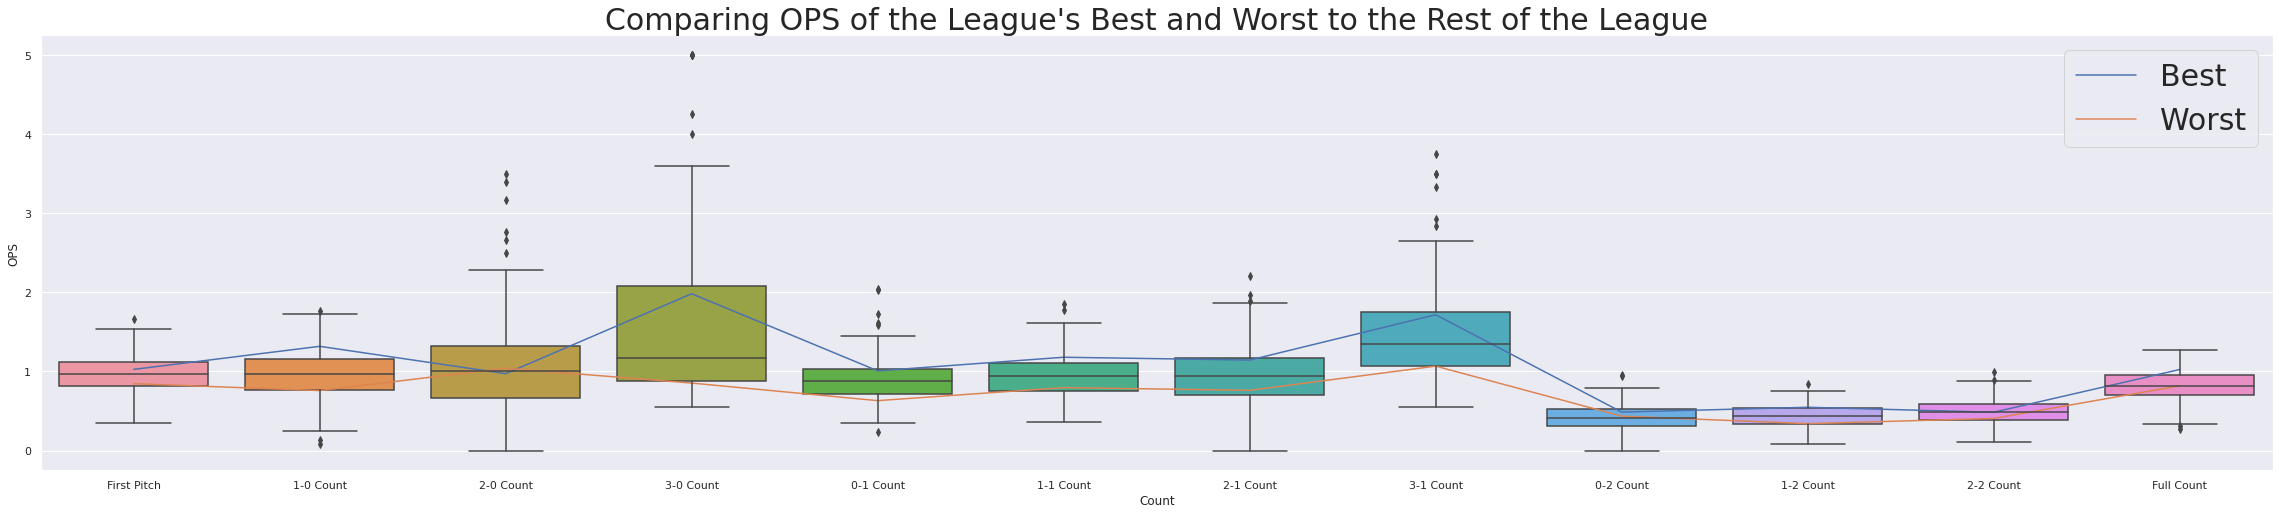

In [79]:
sns.lineplot(x='Count', y='OPS', data=avg_stars)
sns.lineplot(x='Count', y='OPS', data=avg_scrubs)
plt.legend(labels=["Best", "Worst"], fontsize=30)
test = sns.boxplot(x='Count', y='OPS', data=mastersheet)
test.axes.set_title("Comparing OPS of the League's Best and Worst to the Rest of the League",fontsize=30)
plt.show()

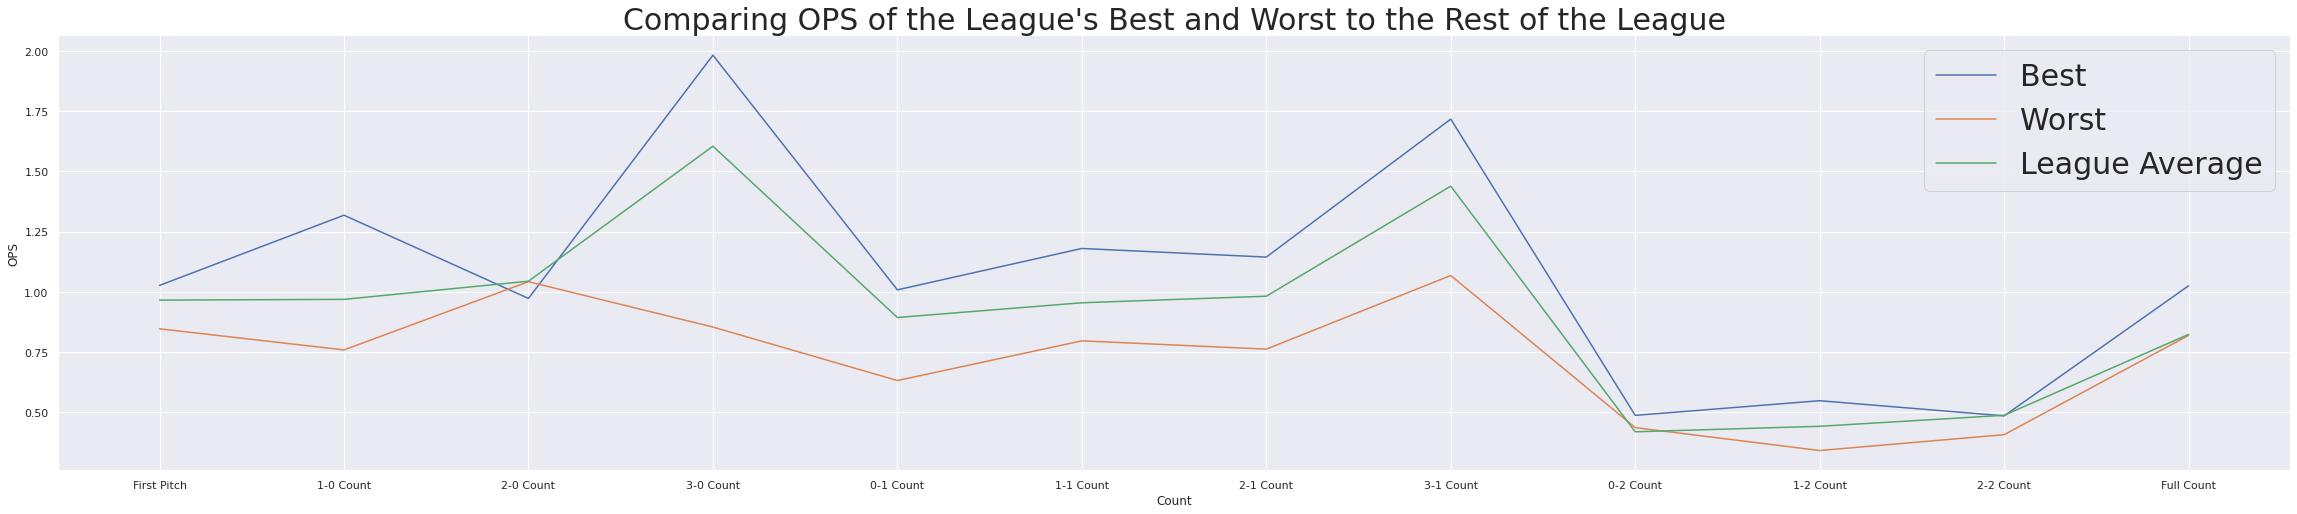

In [80]:
sns.lineplot(x='Count', y='OPS', data=avg_stars)
sns.lineplot(x='Count', y='OPS', data=avg_scrubs)
test = sns.lineplot(x='Count', y='OPS', data=league_avg)
test.axes.set_title("Comparing OPS of the League's Best and Worst to the Rest of the League",fontsize=30)
plt.legend(labels=["Best", "Worst", "League Average"], fontsize=30)

In [63]:
mastersheet = mastersheet.loc[mastersheet['Count'] != 'After 1-0']
mastersheet

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
0,Tampa Bay Rays,Mike Zunino,First Pitch,30,33,30,7.0,8,1,0,...,21,0,3,0.0,0,0.0,1.0,0.154,136.0,114.0
1,Tampa Bay Rays,Mike Zunino,1-0 Count,20,21,21,5.0,6,1,0,...,16,1,0,0.0,0,0.0,0.0,0.167,131.0,117.0
2,Tampa Bay Rays,Mike Zunino,2-0 Count,9,10,10,3.0,3,0,0,...,9,0,0,0.0,0,0.0,0.0,0.125,161.0,121.0
3,Tampa Bay Rays,Mike Zunino,3-0 Count,11,12,2,NaN,1,1,0,...,2,0,0,0.0,0,0.0,0.0,0.500,384.0,124.0
4,Tampa Bay Rays,Mike Zunino,0-1 Count,20,24,24,9.0,9,2,0,...,23,4,0,0.0,0,0.0,0.0,0.250,196.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Rockies,Yonathan Daza,3-1 Count,10,10,8,1.0,1,1,0,...,2,0,0,0.0,0,0.0,0.0,0.125,61.0,-21.0
104,Rockies,Yonathan Daza,0-2 Count,31,34,33,2.0,6,0,0,...,6,0,0,0.0,1,0.0,0.0,0.316,4.0,92.0
105,Rockies,Yonathan Daza,1-2 Count,46,60,60,1.0,14,0,1,...,16,3,0,0.0,0,0.0,0.0,0.400,45.0,152.0
106,Rockies,Yonathan Daza,2-2 Count,32,40,39,2.0,8,1,0,...,12,0,1,0.0,0,0.0,0.0,0.318,55.0,135.0


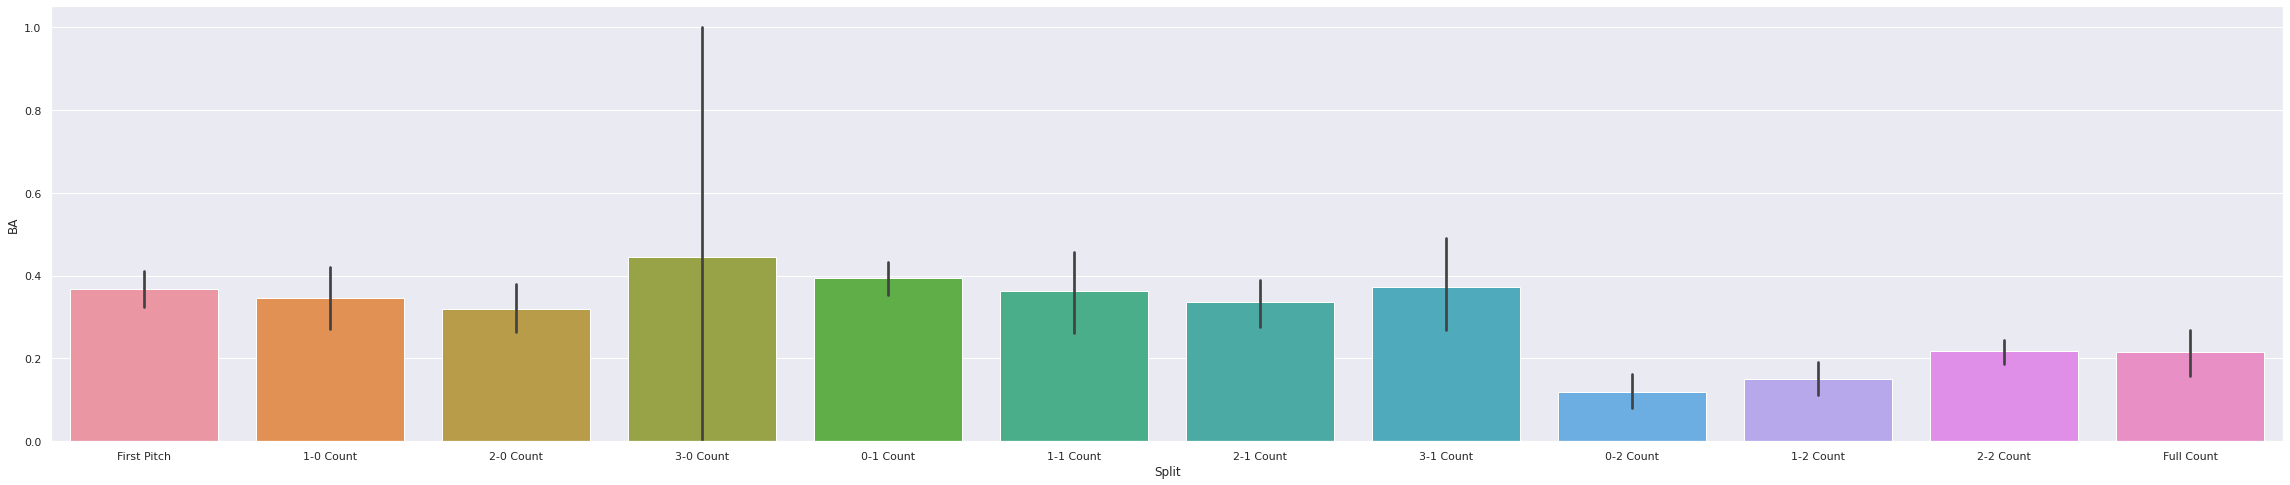

In [5]:
jose = pd.read_csv("jose_pitchcount - Sheet1.csv")

braves = pd.read_csv("NL Batting Pitch Count Splits - Braves.csv")

brewers = pd.read_csv("NL Batting Pitch Count Splits - Brewers.csv")

cardinals = pd.read_csv("NL Batting Pitch Count Splits - Cardinals.csv")

cubs = pd.read_csv("NL Batting Pitch Count Splits - Cubs.csv")

diamondbacks = pd.read_csv("NL Batting Pitch Count Splits - Diamondbacks.csv")

dodgers = pd.read_csv("NL Batting Pitch Count Splits - Dodgers.csv")

giants = pd.read_csv("NL Batting Pitch Count Splits - Giants.csv")

marlins = pd.read_csv("NL Batting Pitch Count Splits - Marlins.csv")

mets = pd.read_csv("NL Batting Pitch Count Splits - Mets.csv")

nationals = pd.read_csv("NL Batting Pitch Count Splits - Nationals.csv")

padres = pd.read_csv("NL Batting Pitch Count Splits - Padres.csv")

phillies = pd.read_csv("NL Batting Pitch Count Splits - Phillies.csv")

pirates = pd.read_csv("NL Batting Pitch Count Splits - Pirates.csv")

reds = pd.read_csv("NL Batting Pitch Count Splits - Reds.csv")

rockies = pd.read_csv("NL Batting Pitch Count Splits - Rockies.csv")

sns.set(rc = {'figure.figsize':(40,8)})

sns.barplot(data = braves, x = "Split", y = "BA")

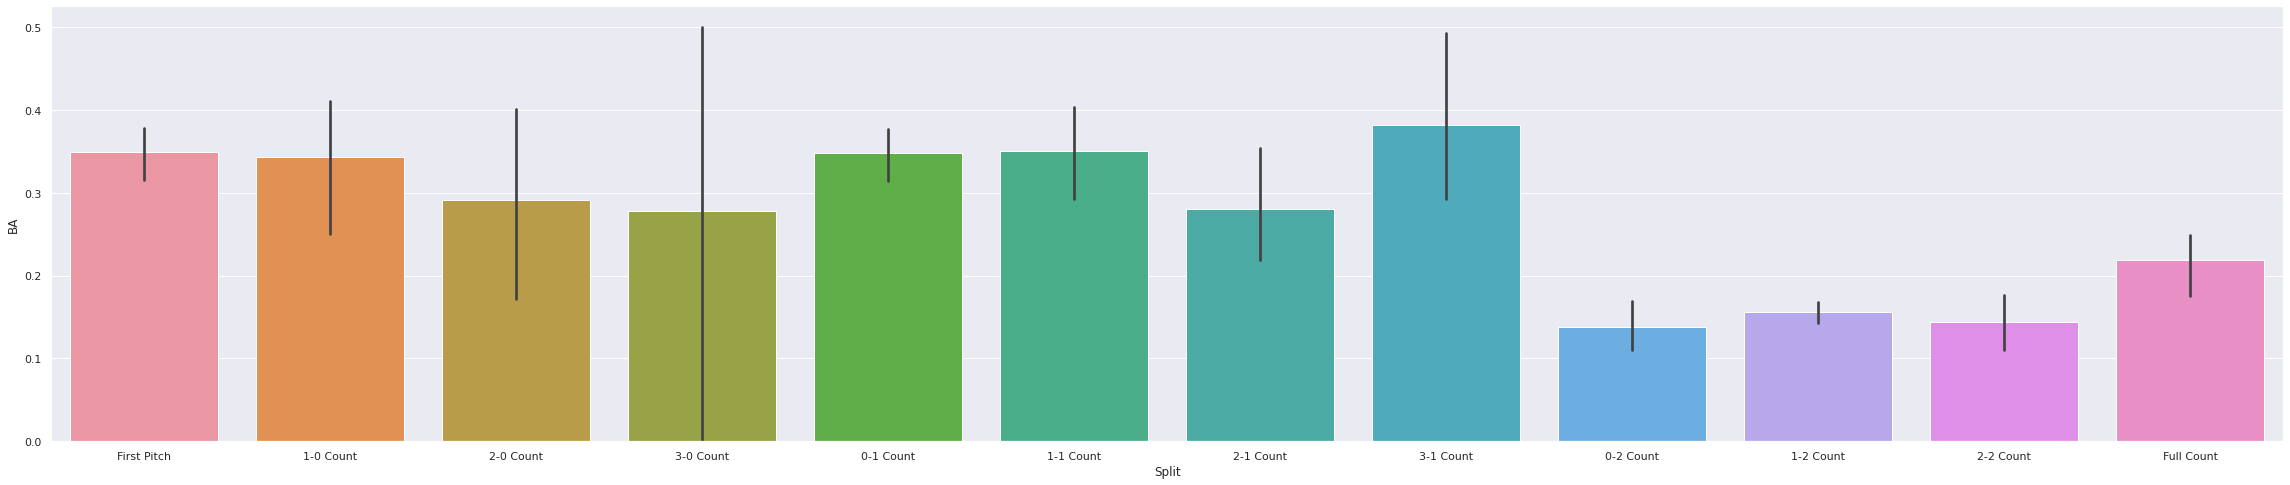

In [6]:
sns.barplot(data = brewers, x = "Split", y = "BA")

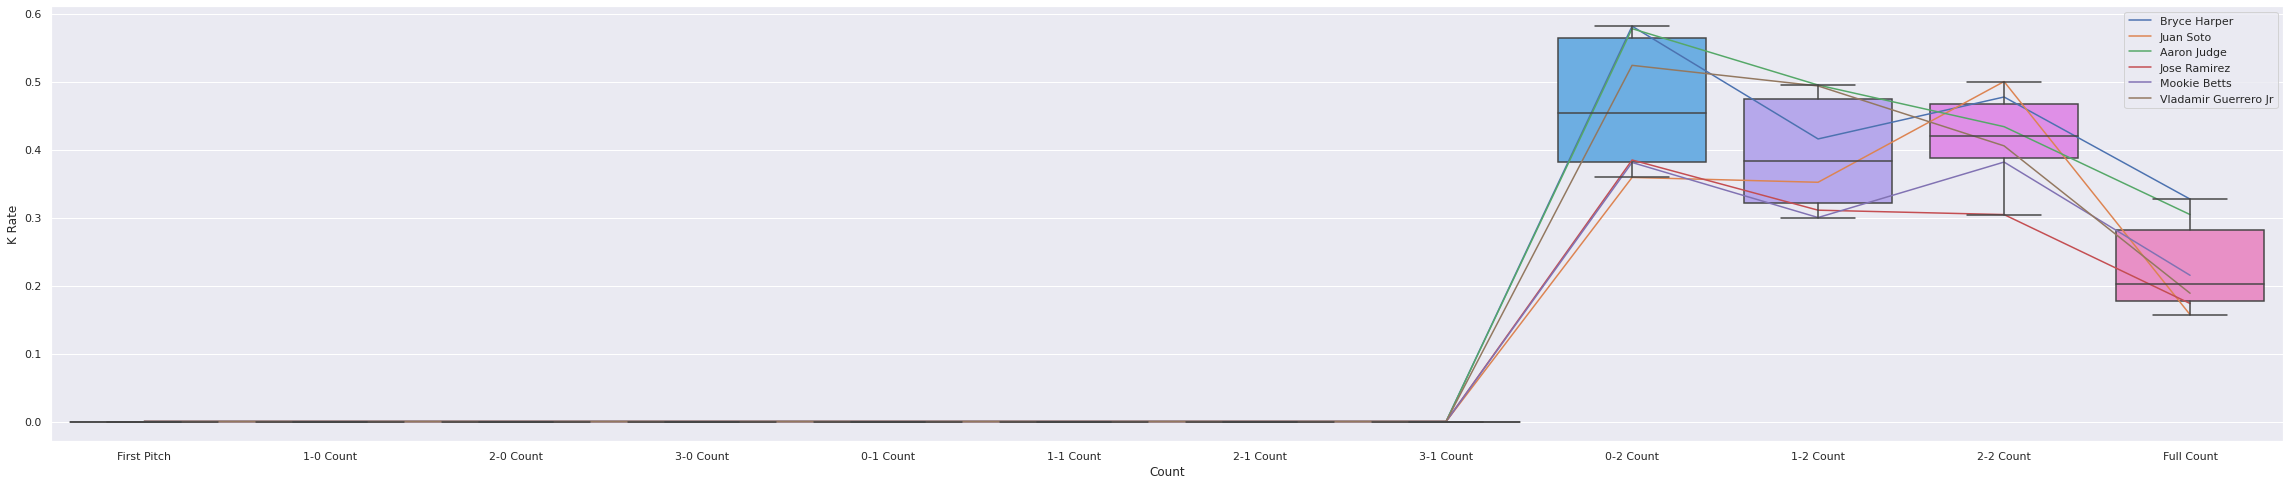

In [46]:
sns.lineplot(x="Count", y="K Rate", data=bryce)
sns.lineplot(x="Count", y="K Rate", data=soto)
sns.lineplot(x="Count", y="K Rate", data=judge)
sns.lineplot(x="Count", y="K Rate", data=jose)
sns.lineplot(x="Count", y="K Rate", data=betts)
sns.lineplot(x="Count", y="K Rate", data=vlad)
plt.legend(labels=["Bryce Harper","Juan Soto", "Aaron Judge", "Jose Ramirez", "Mookie Betts", "Vladamir Guerrero Jr"])

sns.boxplot(data = stars_df, x = "Count", y = "K Rate")

In [41]:
stars_df

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,HBP,SF,IBBROE,BAbip,tOPS+,sOPS+,SH,IBB,ROE,K Rate
84,Phillies,Bryce Harper,First Pitch,51,63,60,18.0,22,6,0,...,2,1,NaN,0.316,97.0,122.0,0.0,0.0,0.0,0.0
85,Phillies,Bryce Harper,1-0 Count,23,24,24,10.0,10,1,0,...,0,0,NaN,0.300,153.0,190.0,0.0,0.0,0.0,0.0
86,Phillies,Bryce Harper,2-0 Count,9,10,10,1.0,5,1,0,...,0,0,NaN,0.444,163.0,177.0,0.0,0.0,0.0,0.0
87,Phillies,Bryce Harper,3-0 Count,35,37,2,1.0,1,0,0,...,0,0,NaN,0.000,452.0,256.0,0.0,14.0,0.0,0.0
88,Phillies,Bryce Harper,0-1 Count,44,47,44,7.0,12,7,0,...,1,1,NaN,0.233,58.0,98.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,New York Yankees,Aaron Judge,3-1 Count,39,40,17,4.0,6,3,0,...,0,0,NaN,0.313,224.0,107.0,0.0,0.0,1.0,0.0
272,New York Yankees,Aaron Judge,0-2 Count,38,45,45,9.0,9,3,0,...,0,0,NaN,0.412,27.0,204.0,0.0,0.0,0.0,0.577778
273,New York Yankees,Aaron Judge,1-2 Count,76,97,97,5.0,21,4,0,...,0,0,NaN,0.391,22.0,176.0,0.0,0.0,1.0,0.494845
274,New York Yankees,Aaron Judge,2-2 Count,86,113,113,10.0,22,2,0,...,0,0,NaN,0.288,16.0,132.0,0.0,0.0,2.0,0.433628


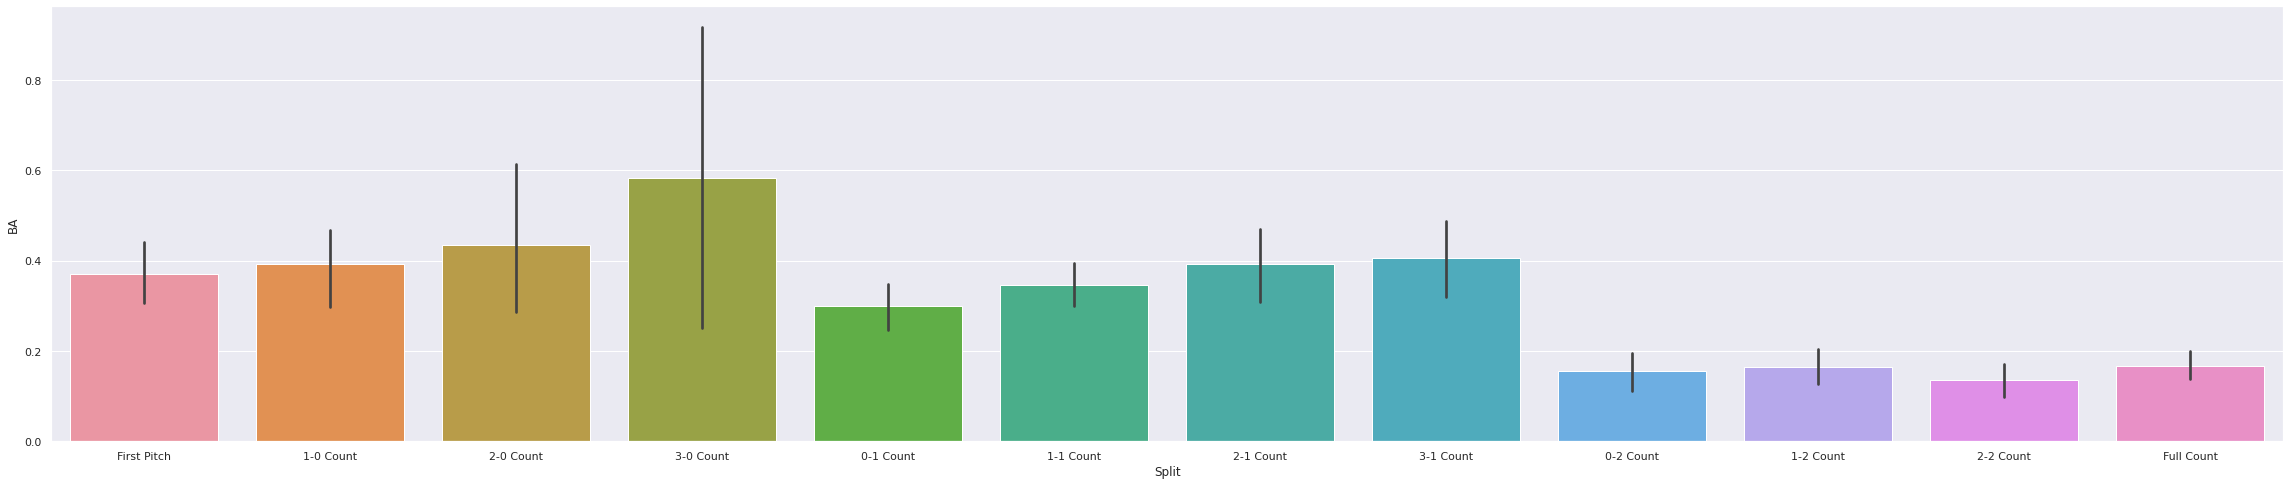

In [8]:
sns.barplot(data = cubs, x = "Split", y = "BA")

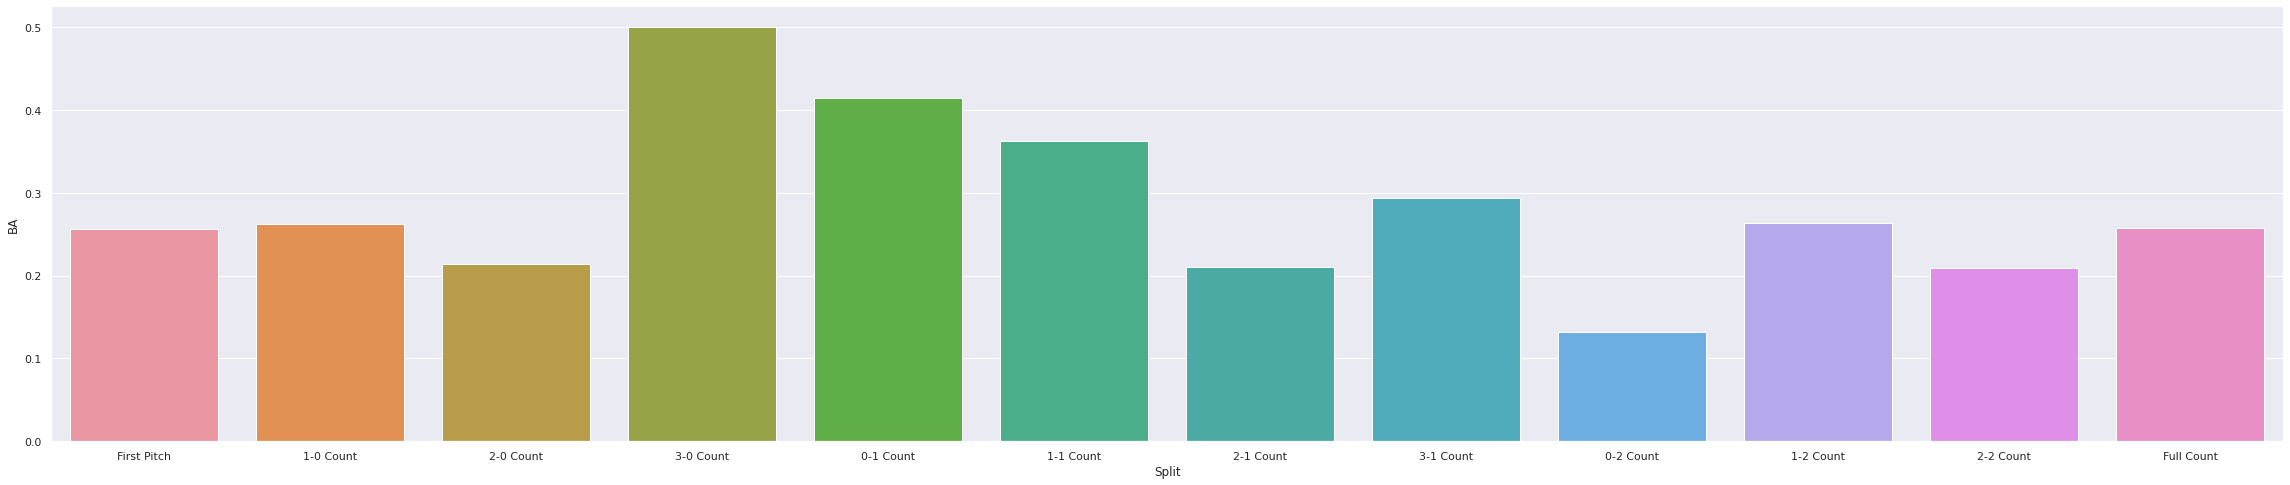

In [9]:
sns.barplot(data=jose, x="Split", y="BA")

In [21]:
helper = mastersheet.loc[mastersheet["Count"] == "First Pitch"]
helper

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
0,Tampa Bay Rays,Mike Zunino,First Pitch,30,33,30,7.0,8,1,0,...,21,0,3,0.0,0,0.0,1.0,0.154,136.0,114.0
12,Tampa Bay Rays,Yandy Diaz,First Pitch,52,63,62,12.0,21,4,0,...,31,5,0,0.0,1,0.0,1.0,0.312,124.0,80.0
24,Tampa Bay Rays,Brandon Lowe,First Pitch,72,94,93,22.0,34,5,0,...,72,0,0,0.0,1,0.0,0.0,0.277,155.0,135.0
36,Tampa Bay Rays,Wander Franco,First Pitch,39,53,51,9.0,15,5,1,...,31,1,2,0.0,0,0.0,1.0,0.250,124.0,95.0
48,Tampa Bay Rays,Joey Wendle,First Pitch,42,50,46,17.0,18,4,0,...,31,1,3,0.0,1,0.0,0.0,0.341,191.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,Rockies,Trevor Story,First Pitch,56,68,66,11.0,20,7,1,...,35,0,1,0.0,1,0.0,0.0,0.277,106.0,78.0
60,Rockies,Ryan McMahon,First Pitch,62,78,74,19.0,21,3,0,...,36,3,2,0.0,2,0.0,1.0,0.236,97.0,67.0
72,Rockies,Raimel Tapia,First Pitch,37,44,42,15.0,14,4,0,...,18,2,0,1.0,1,0.0,0.0,0.326,115.0,66.0
84,Rockies,Garret Hampson,First Pitch,41,48,46,15.0,13,3,1,...,24,2,0,2.0,0,0.0,1.0,0.250,135.0,70.0


In [22]:

j = mastersheet.loc[mastersheet['Team'] == "New York Yankees"]
j = j.loc[j['Count'] == "First Pitch"]
j

,Team,Player,Count,G,PA,AB,R,H,2B,3B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
204,New York Yankees,Gary Sanchez,First Pitch,27,32,30,9.0,3,0,0,...,9,2,2,0.0,0,0.0,0.0,0.036,22.0,-4.0
216,New York Yankees,DJ LeMahieu,First Pitch,56,67,61,10.0,17,4,0,...,24,3,4,0.0,2,0.0,0.0,0.258,98.0,56.0
228,New York Yankees,Gleyber Torres,First Pitch,47,57,55,6.0,21,3,0,...,27,2,1,1.0,0,0.0,1.0,0.370,153.0,95.0
240,New York Yankees,Gio Urshela,First Pitch,40,50,50,7.0,26,6,0,...,44,6,0,0.0,0,0.0,0.0,0.478,283.0,198.0
252,New York Yankees,Brett Gardner,First Pitch,17,18,17,8.0,10,1,0,...,14,0,0,1.0,0,0.0,0.0,0.563,307.0,208.0
264,New York Yankees,Aaron Judge,First Pitch,51,60,56,10.0,21,2,0,...,29,6,2,0.0,2,0.0,0.0,0.339,98.0,97.0
276,New York Yankees,Giancarlo Stanton,First Pitch,31,35,34,5.0,8,0,0,...,14,4,0,0.0,1,0.0,0.0,0.182,45.0,36.0


In [23]:
first_pitch = mastersheet.loc[mastersheet['Count'] == "First Pitch"]
yankees = mastersheet.loc[mastersheet['Team'] == "New York Yankees"]
c = mastersheet.loc[mastersheet['Count'] == "1-0 Count"]
d = mastersheet.loc[mastersheet['Count'] == "2-0 Count"]

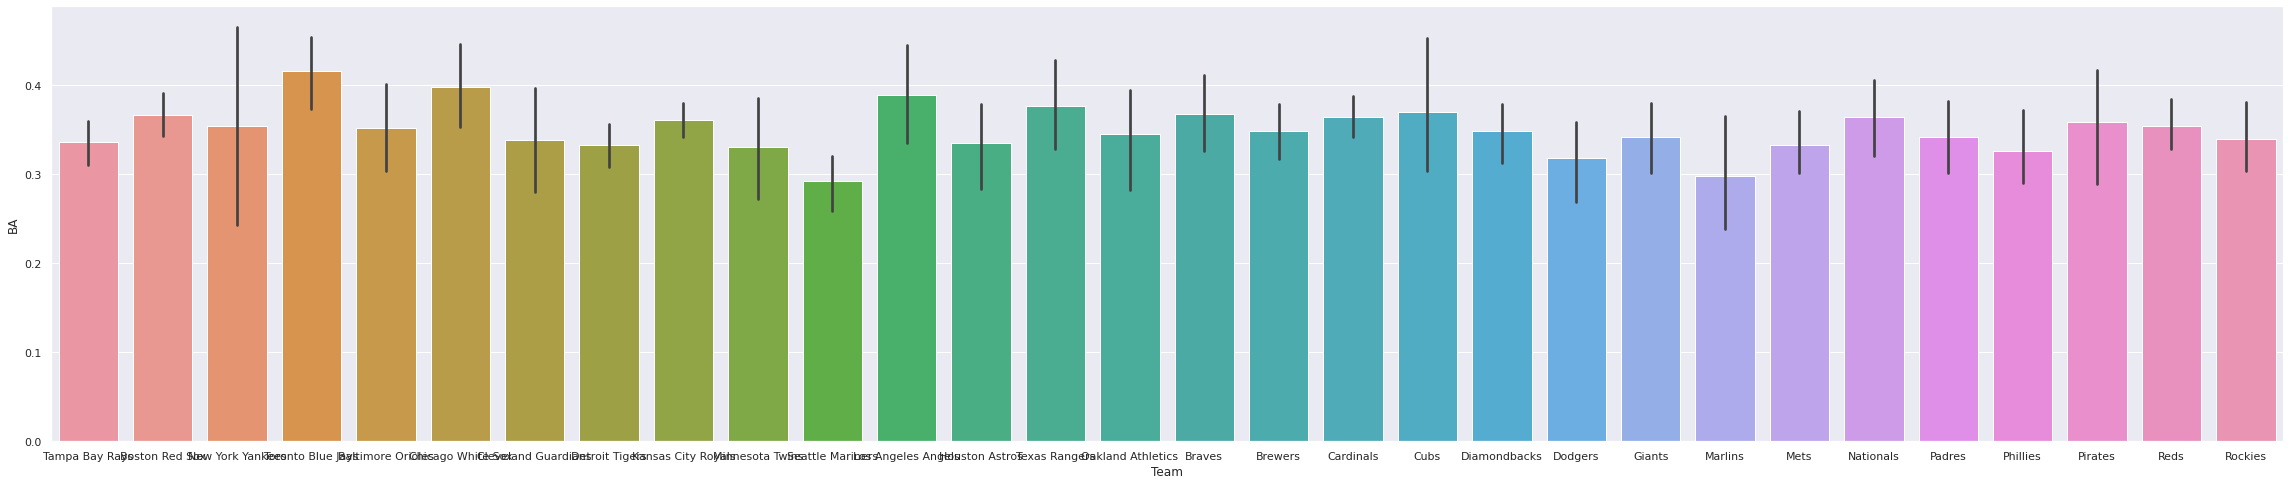

In [24]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.barplot(data = first_pitch, x = "Team", y = "BA")

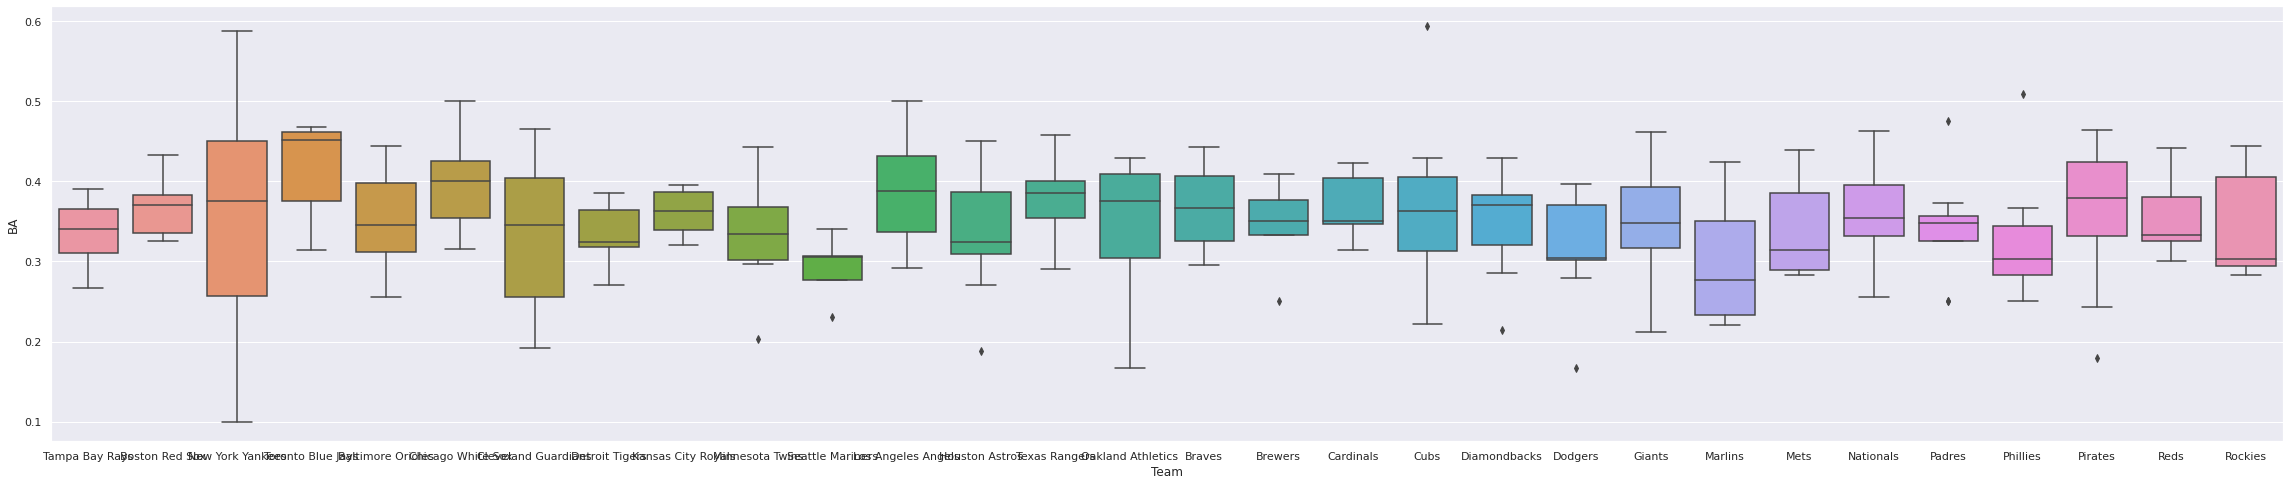

In [25]:
sns.set(rc = {'figure.figsize':(40,8)})
sns.boxplot(x="Team", y="BA", data=first_pitch)

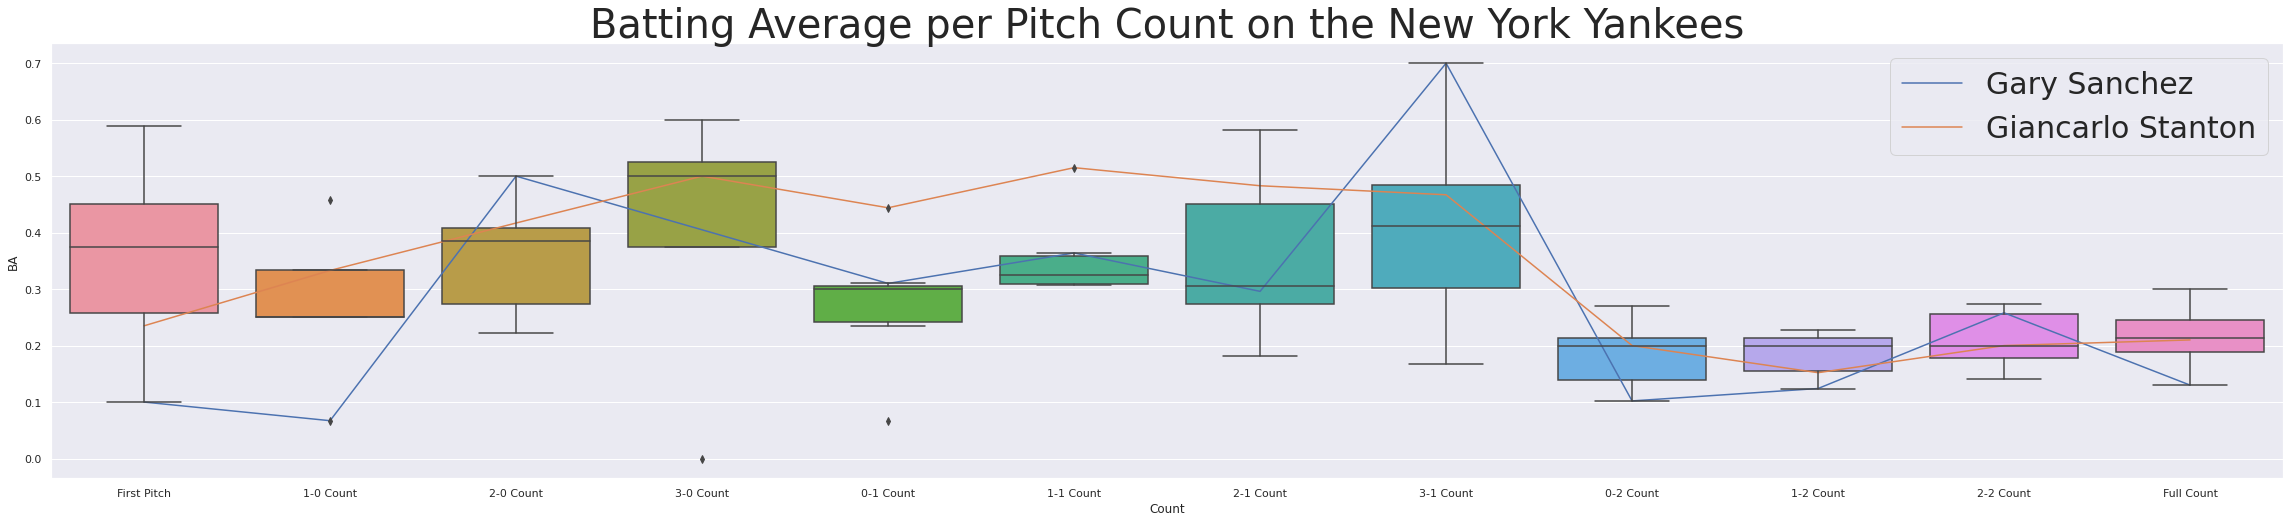

In [81]:
gary = yankees.loc[yankees['Player'] == "Gary Sanchez"]
stanton = yankees.loc[yankees['Player'] == "Giancarlo Stanton"]
sns.lineplot(x = "Count", y = "BA", data = gary)
sns.lineplot(x = "Count", y = "BA", data = stanton)
test = sns.boxplot(x="Count", y="BA", data = yankees)
test.axes.set_title("Batting Average per Pitch Count on the New York Yankees",fontsize=40)
plt.legend(labels=["Gary Sanchez","Giancarlo Stanton"], fontsize=30)
plt.show()

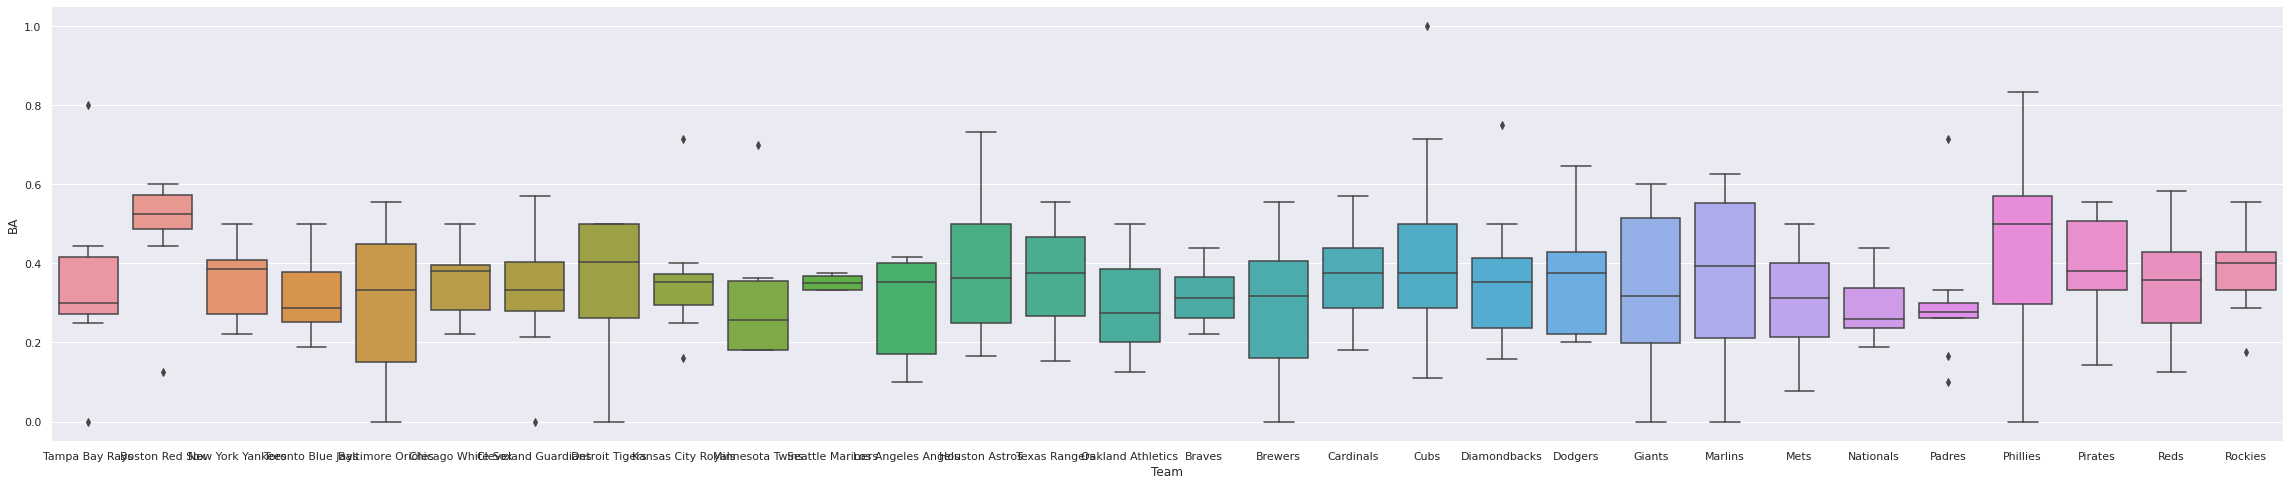

In [27]:
sns.boxplot(x="Team", y="BA", data = d)

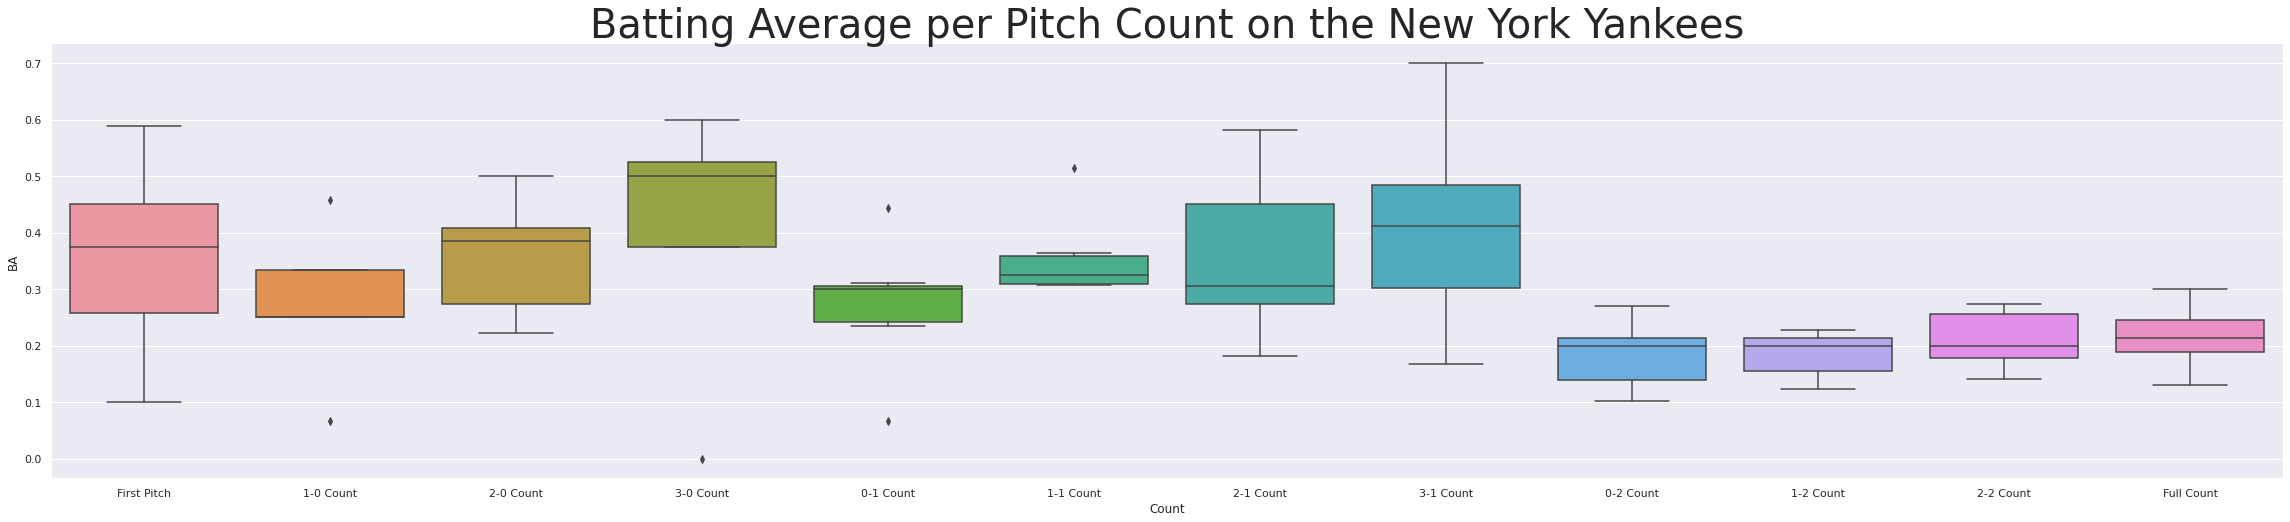

In [28]:
test = sns.boxplot(x="Count", y="BA", data = yankees)
test.axes.set_title("Batting Average per Pitch Count on the New York Yankees",fontsize=40)

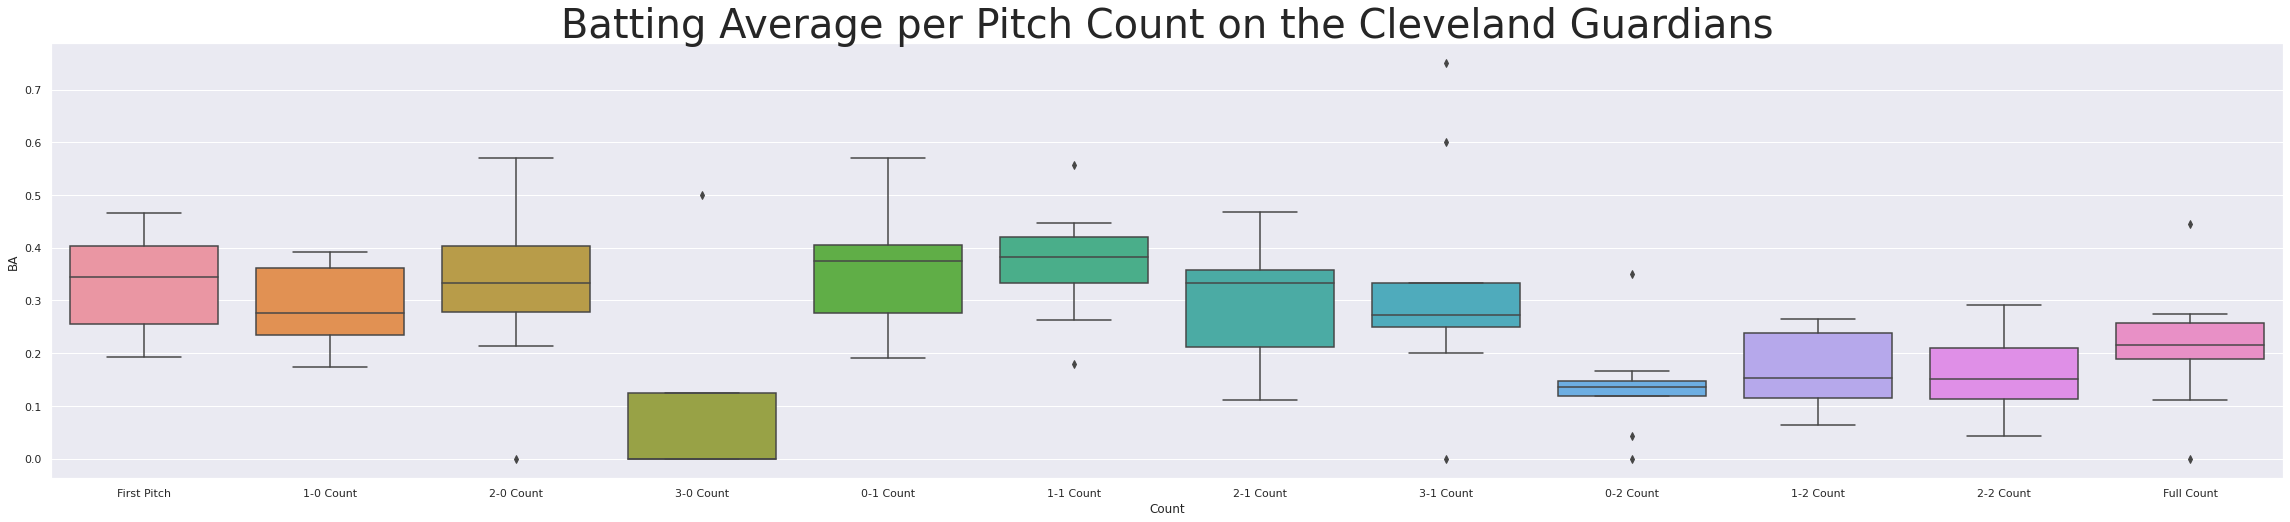

In [29]:
guardians = mastersheet.loc[mastersheet['Team'] == "Cleveland Guardians"]
testCle = sns.boxplot(x="Count", y="BA", data = guardians)
testCle.axes.set_title("Batting Average per Pitch Count on the Cleveland Guardians",fontsize=40)

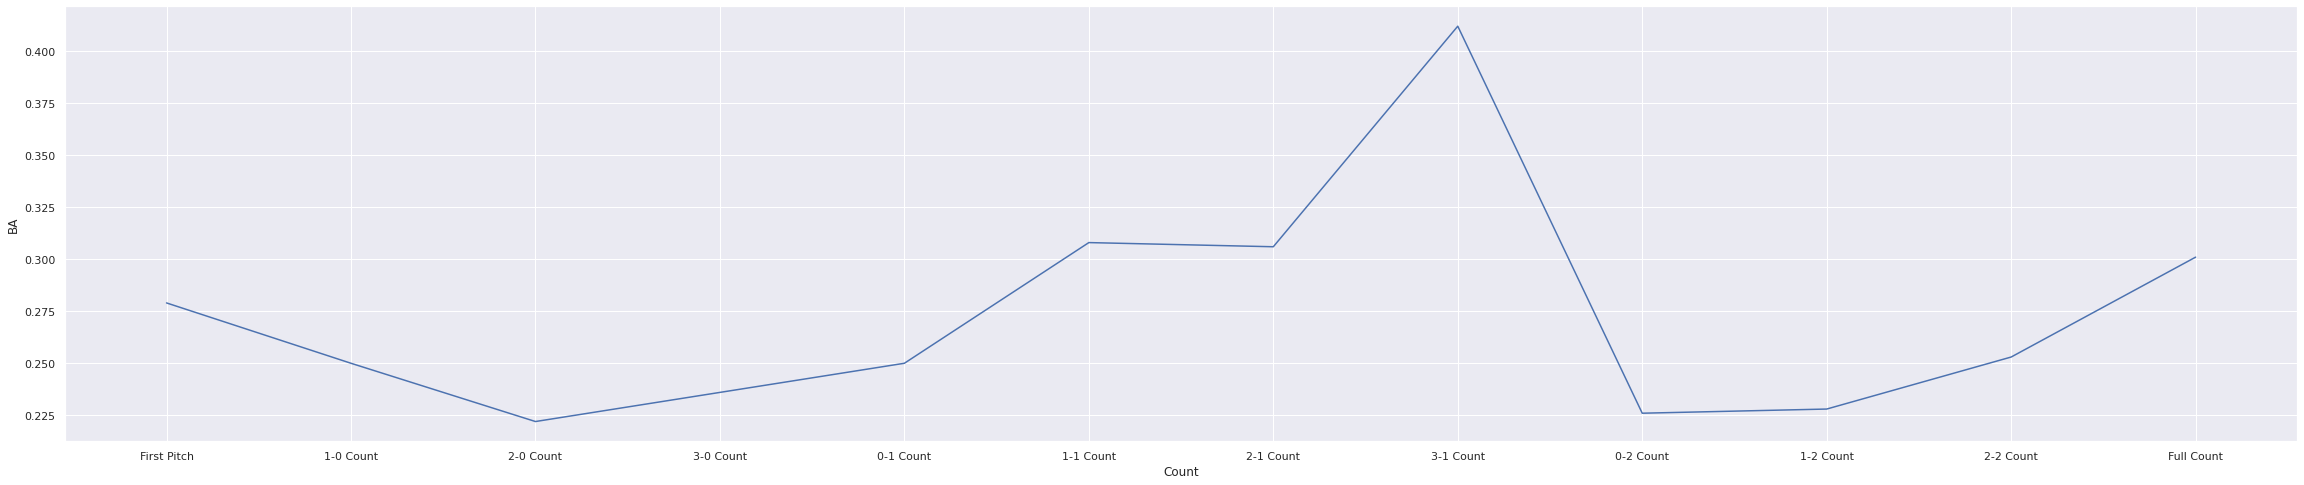

In [30]:
dj = yankees.loc[yankees['Player'] == 'DJ LeMahieu']
sns.lineplot(x = "Count", y = "BA", data = dj)

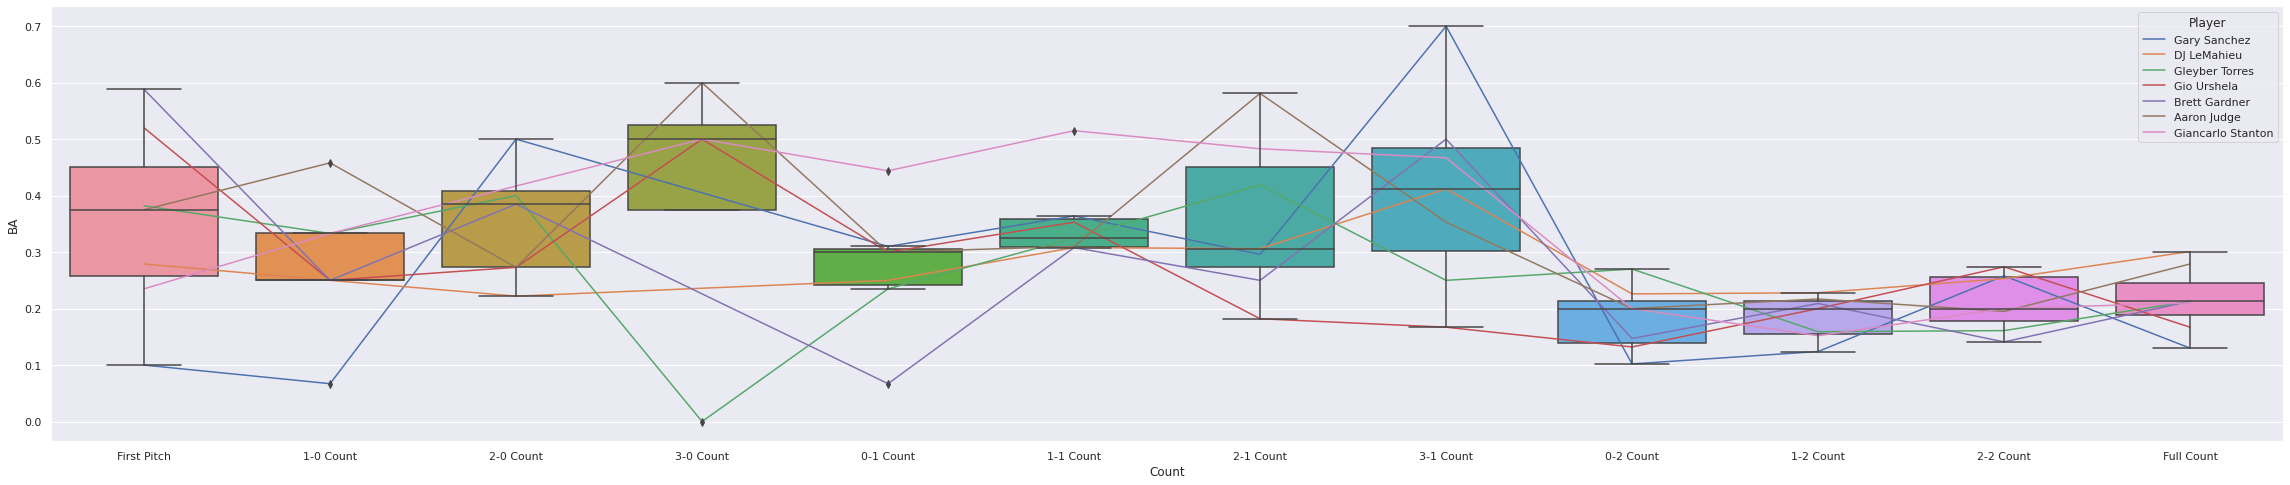

In [31]:

sns.lineplot(x='Count', y="BA", hue="Player", data=yankees)
sns.boxplot(x="Count", y="BA", data = yankees)
plt.show()

In [32]:
sns.lineplot(x="Count", y="BA", data=bryce)
sns.lineplot(x="Count", y="BA", data=soto)
sns.lineplot(x="Count", y="BA", data=judge)
sns.lineplot(x="Count", y="BA", data=jose)
sns.lineplot(x="Count", y="BA", data=betts)
sns.lineplot(x="Count", y="BA", data=vlad)
plt.legend(labels=["Bryce Harper","Juan Soto", "Aaron Judge", "Jose Ramirez", "Mookie Betts", "Vladamir Guerrero Jr"])
sns.boxplot(x="Count", y = "BA", data = mastersheet)
plt.show()

NameError: NameError: name 'bryce' is not defined

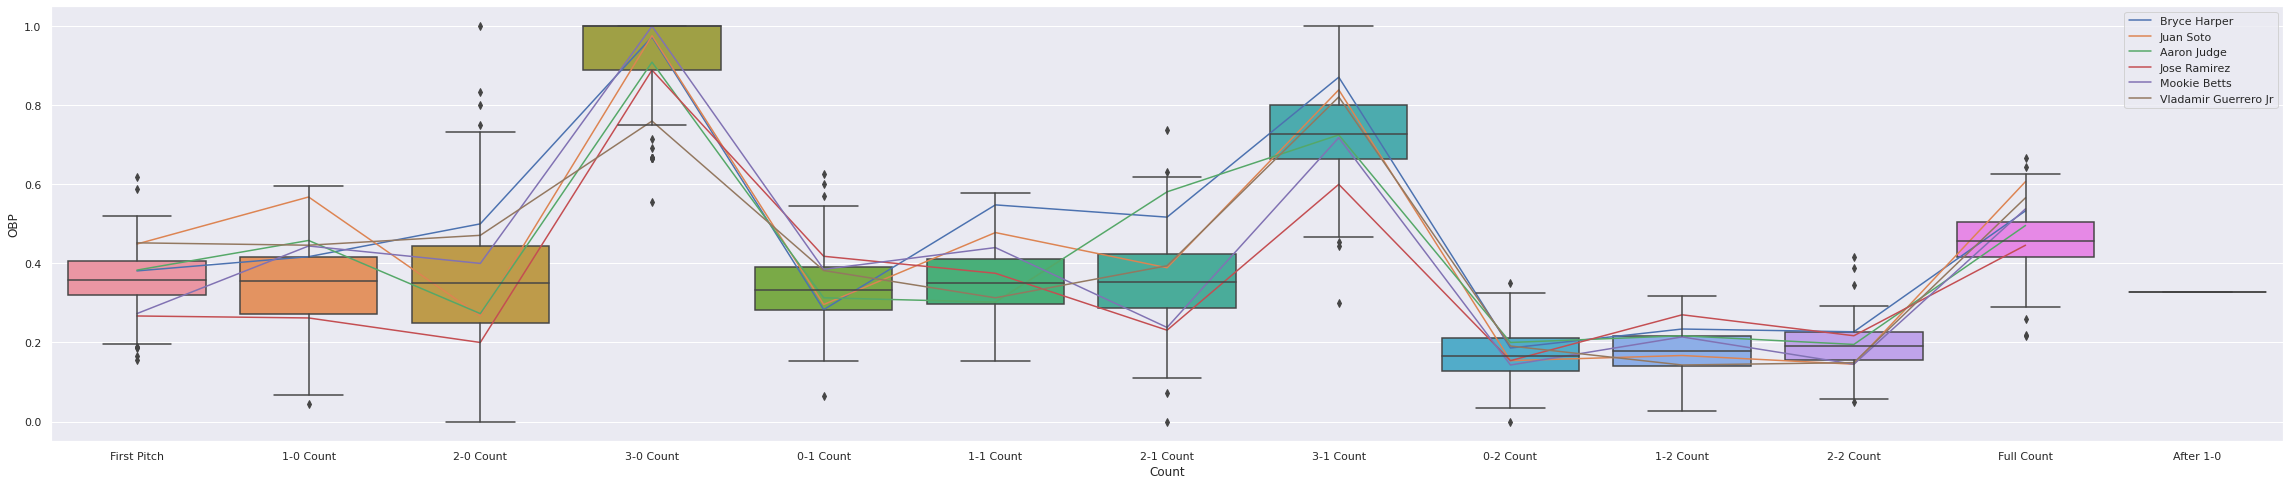

In [38]:
sns.lineplot(x="Count", y="OBP", data=bryce)
sns.lineplot(x="Count", y="OBP", data=soto)
sns.lineplot(x="Count", y="OBP", data=judge)
sns.lineplot(x="Count", y="OBP", data=jose)
sns.lineplot(x="Count", y="OBP", data=betts)
sns.lineplot(x="Count", y="OBP", data=vlad)
sns.boxplot(x="Count", y = "OBP", data = mastersheet)
plt.legend(labels=["Bryce Harper","Juan Soto", "Aaron Judge", "Jose Ramirez", "Mookie Betts", "Vladamir Guerrero Jr"])
plt.show()

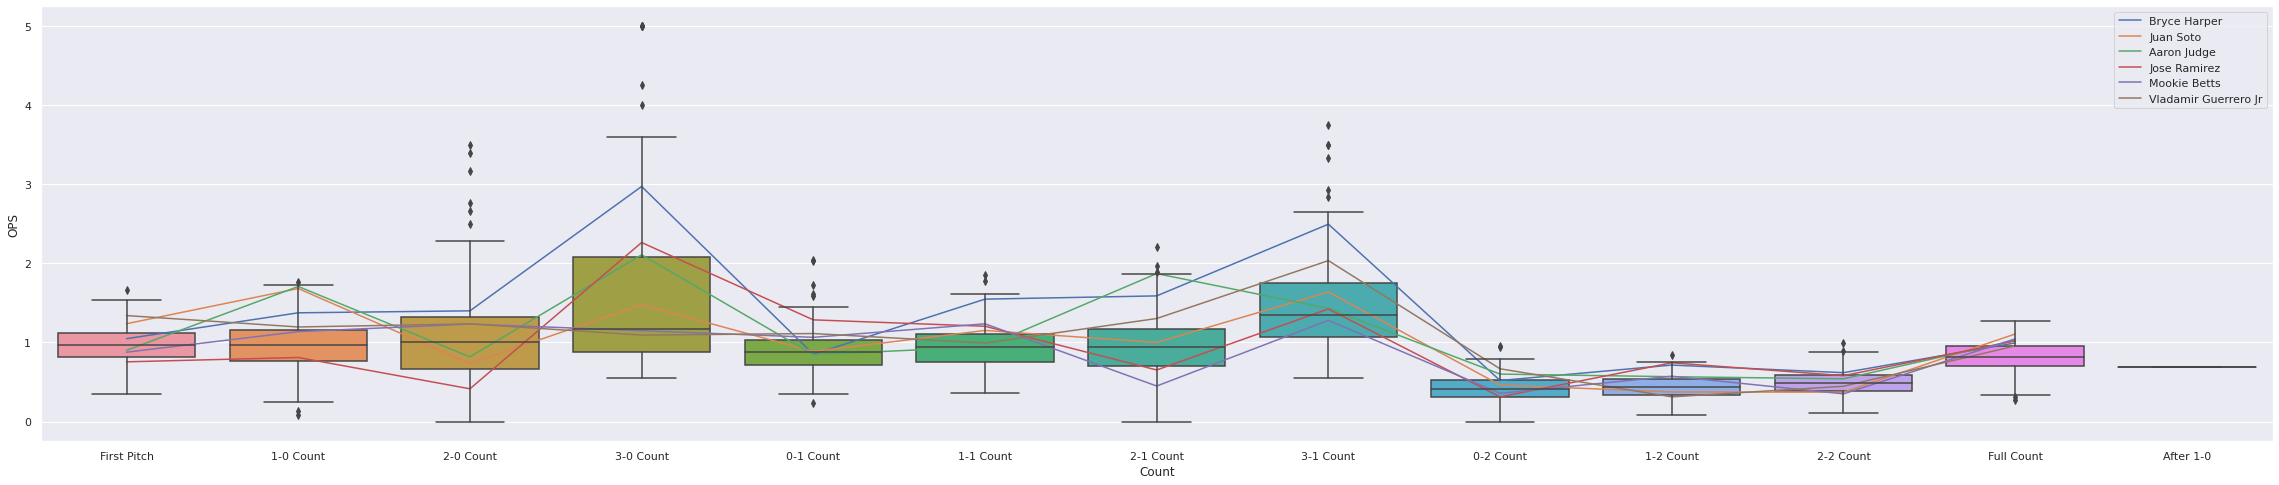

In [39]:
sns.lineplot(x="Count", y="OPS", data=bryce)
sns.lineplot(x="Count", y="OPS", data=soto)
sns.lineplot(x="Count", y="OPS", data=judge)
sns.lineplot(x="Count", y="OPS", data=jose)
sns.lineplot(x="Count", y="OPS", data=betts)
sns.lineplot(x="Count", y="OPS", data=vlad)
sns.boxplot(x="Count", y = "OPS", data = mastersheet)
plt.legend(labels=["Bryce Harper","Juan Soto", "Aaron Judge", "Jose Ramirez", "Mookie Betts", "Vladamir Guerrero Jr"])
plt.show()

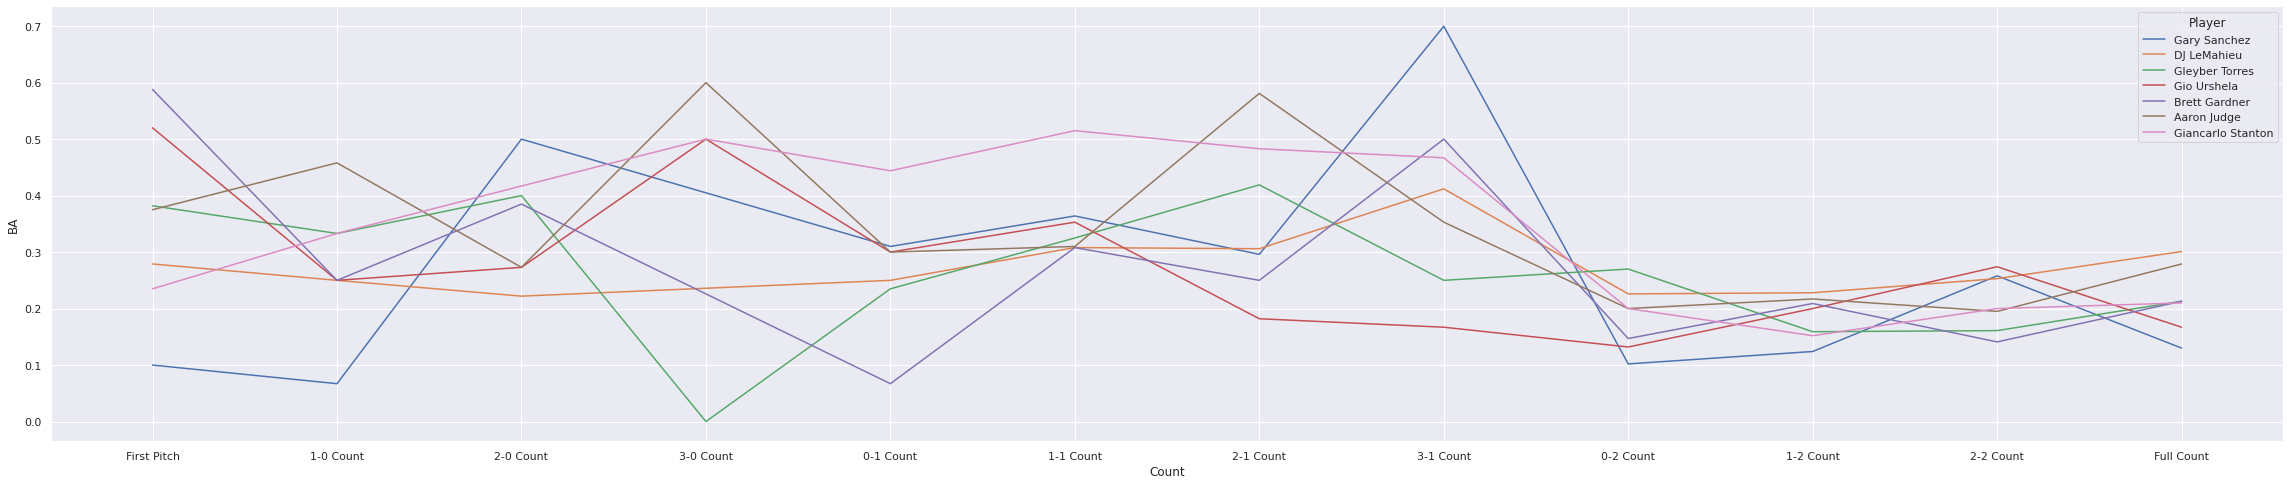

In [27]:
sns.lineplot(x='Count', y="BA", hue="Player", data=yankees)

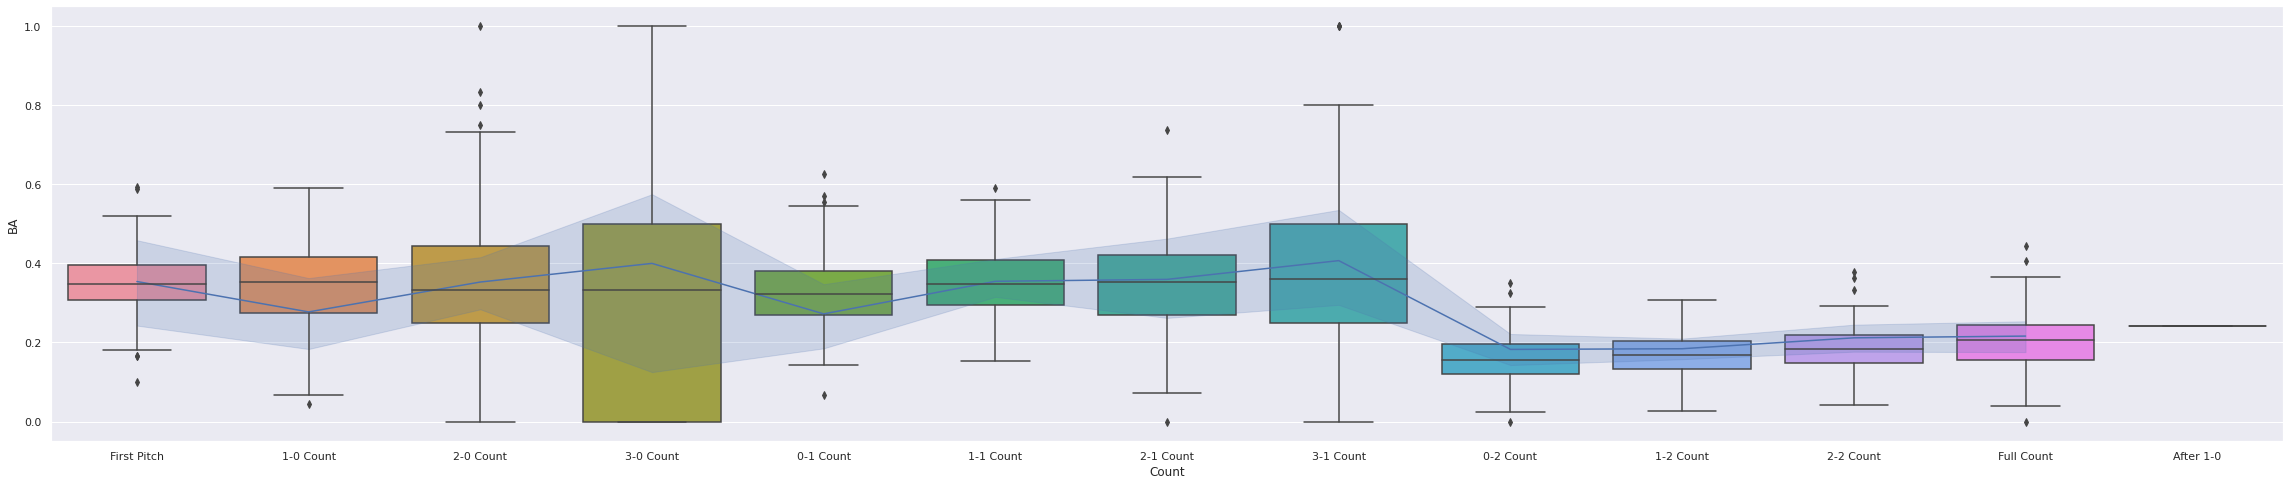

In [42]:
sns.lineplot(x = "Count", y = "BA", data = yankees)
sns.boxplot(x="Count", y="BA", data = mastersheet)
plt.show()

In [36]:
yankees

,Team,Player,Count,G,GS,PA,AB,R,H,2B,...,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,IBBROE
204,New York Yankees,Gary Sanchez,First Pitch,27,NaN,32,30,9.0,3,0,...,2,2,0.0,0,0.0,0.0,0.036,22.0,-4.0,NaN
205,New York Yankees,Gary Sanchez,1-0 Count,15,NaN,15,15,1.0,1,0,...,1,0,0.0,0,0.0,0.0,0.067,-62.0,-69.0,NaN
206,New York Yankees,Gary Sanchez,2-0 Count,8,NaN,8,8,3.0,4,1,...,0,0,0.0,0,0.0,0.0,0.333,388.0,249.0,NaN
207,New York Yankees,Gary Sanchez,3-0 Count,12,NaN,12,0,NaN,0,0,...,0,0,0.0,0,3.0,0.0,NaN,NaN,NaN,NaN
208,New York Yankees,Gary Sanchez,0-1 Count,28,NaN,29,29,5.0,9,3,...,2,0,0.0,0,0.0,0.0,0.259,148.0,116.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,New York Yankees,Giancarlo Stanton,3-1 Count,27,NaN,33,15,4.0,7,0,...,0,0,0.0,0,0.0,0.0,0.385,282.0,135.0,NaN
284,New York Yankees,Giancarlo Stanton,0-2 Count,48,NaN,60,60,7.0,12,2,...,3,0,0.0,0,0.0,0.0,0.400,40.0,218.0,NaN
285,New York Yankees,Giancarlo Stanton,1-2 Count,69,NaN,94,92,6.0,14,2,...,2,2,0.0,0,0.0,1.0,0.286,-6.0,102.0,NaN
286,New York Yankees,Giancarlo Stanton,2-2 Count,74,NaN,100,100,7.0,20,5,...,3,0,0.0,0,0.0,1.0,0.294,34.0,154.0,NaN


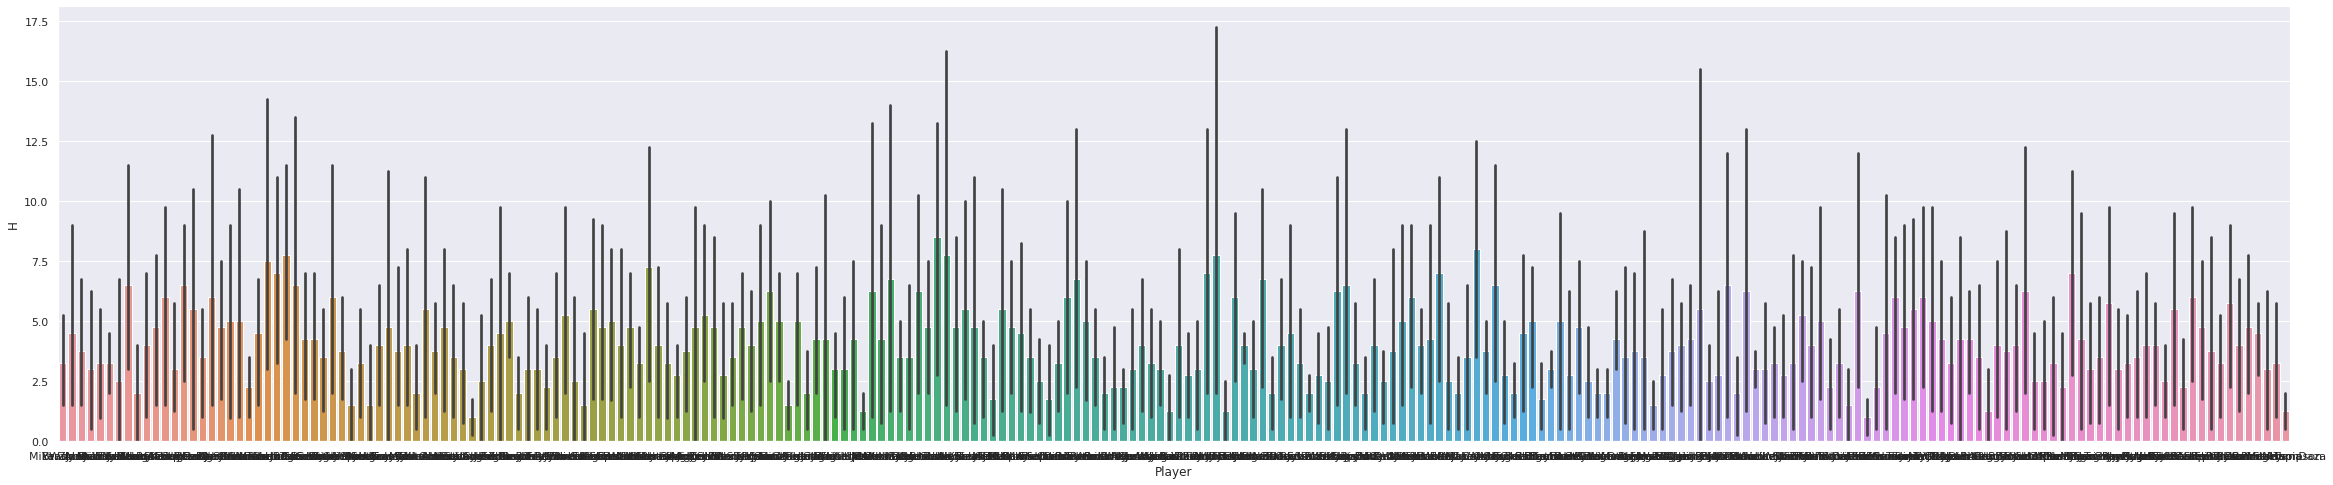

In [24]:
#fullstats = mastersheet.groupby(['Player']).sum()
#fullstats = fullstats.reset_index()
twoo = mastersheet.loc[mastersheet['Count'] == "2-0 Count"]
threeo = mastersheet.loc[mastersheet['Count'] == "3-0 Count"]
threeone = mastersheet.loc[mastersheet['Count'] == "3-1 Count"]
twoone = mastersheet.loc[mastersheet['Count'] == "2-1 Count"]
fs = twoo.append(threeo).append(threeone).append(twoone)
sns.barplot(x = "Player", y = "H", data = fs)